# PROYECTO: INDICADORES DE SALUD - GRAFICAS

## Importar librerías

In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import textwrap
import random

In [3]:
#Colores a usar en las figuras
colores = ['#002A5C', '#0D3D70', '#1C4E84', '#2B6098', '#3A72AC',
        '#4984C0', '#5896D4', '#67A8E8', '#76BAFC', '#85CCFF']

# Establecer el estilo de fondo de forma global
sns.set_style("whitegrid")

# Configuración global de las figuras
config = {
    'figure.dpi': 100,
    'axes.titlesize': 13,
    'axes.labelsize': 12,
    'axes.grid': True,
    'lines.linewidth': 2,
    'figure.facecolor': 'white'
}

# Actualizar las configuraciones globales
plt.rcParams.update(config)

In [4]:
#color=random.choice(colores)

## Cargar bases de datos

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [6]:
#Cargar base de datos egresos
file = '/content/gdrive/MyDrive/Colab Notebooks/Bootcamp - Ciencia de Datos/PROYECTO/Proyecto_Graficas/Bases/2022/egresos.csv'
egresos = pd.read_csv(file, on_bad_lines='skip')
egresos.head()

ID                               CLUES       INGRE      EGRESO  DIAS_ESTA  \
0   1  CENTENARIO HOSPITAL MIGUEL HIDALGO  2010-01-04  2010-01-04          1   
1   2  CENTENARIO HOSPITAL MIGUEL HIDALGO  2009-12-30  2009-12-30          1   
2   3  CENTENARIO HOSPITAL MIGUEL HIDALGO  2010-01-06  2010-01-06          1   
3   4  CENTENARIO HOSPITAL MIGUEL HIDALGO  2010-01-05  2010-01-05          1   
4   5  CENTENARIO HOSPITAL MIGUEL HIDALGO  2010-01-04  2010-01-04          1   

  CVEEDAD  EDAD NACIOEN SEXO   PESO  ...           MUNIC LOC TIPSERV  \
0   MESES     2      NO    M  999.0  ...  AGUASCALIENTES   1  NORMAL   
1    AÑOS     5     NaN    M  999.0  ...  AGUASCALIENTES   1  NORMAL   
2    AÑOS     6     NaN    H  999.0  ...        ASIENTOS   3  NORMAL   
3    AÑOS     5     NaN    H  999.0  ...        EL LLANO   3  NORMAL   
4    AÑOS    18     NaN    H  999.0  ...  AGUASCALIENTES   1  NORMAL   

             PROCED                                           DIAG_INI  \
0  CONSULTA EXTERNA  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...   
1  CONSULTA EXTERNA                                  LEUCEMIA LINFOIDE   
2  CONSULTA EXTERNA                                  LEUCEMIA LINFOIDE   
3  CONSULTA EXTERNA                                  LEUCEMIA LINFOIDE   
4  CONSULTA EXTERNA                           ENFERMEDAD RENAL CRÓNICA   

                                            AFECPRIN          VEZ CAUSAEXT  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...  SUBSECUENTE      NaN   
1                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
2                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
3                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
4                           ENFERMEDAD RENAL CRÓNICA  SUBSECUENTE      NaN   

  INFEC  MOTEGRE  
0    NO  MEJORIA  
1    NO  MEJORIA  
2    NO  MEJORIA  
3    NO  MEJORIA  
4    NO  MEJORIA  

[5 rows x 22 columns]

In [7]:
egresos['EGRESO'] = pd.to_datetime(egresos['EGRESO'])
egresos['INGRE'] = pd.to_datetime(egresos['INGRE'])

In [8]:
#Cargar base de datos afecciones
file = '/content/gdrive/MyDrive/Colab Notebooks/Bootcamp - Ciencia de Datos/PROYECTO/Proyecto_Graficas/Bases/2022/afecciones.csv'
afecciones = pd.read_csv(file, on_bad_lines='skip')
afecciones.head()

ID  NUMAFEC                                        AFEC
0    399        2  FRACTURA DE HUESOS DEL CRÁNEO Y DE LA CARA
1    399        3                      FRACTURA DEL ANTEBRAZO
2    399        1            HIPERTENSIÓN ESENCIAL (PRIMARIA)
3  25245        1             ATENCIÓN PARA LA ANTICONCEPCIÓN
4  25569        1             ATENCIÓN PARA LA ANTICONCEPCIÓN

In [9]:
#Cargar base de datos procedimientos
file = '/content/gdrive/MyDrive/Colab Notebooks/Bootcamp - Ciencia de Datos/PROYECTO/Proyecto_Graficas/Bases/2022/procedimientos.csv'
procedimientos = pd.read_csv(file, on_bad_lines='skip')
procedimientos.head()

ID  NUMPROMED        TIPO       PROMED     ANEST QUIROF    QH    QM
0  10952          1  QUIRURGICO  LAPAROTOMÍA  REGIONAL     EN  99.0  99.0
1  23436          1  QUIRURGICO  LAPAROTOMÍA  REGIONAL     EN   1.0   0.0
2  23659          1  QUIRURGICO  LAPAROTOMÍA  REGIONAL     EN   1.0   0.0
3  23789          1  QUIRURGICO  LAPAROTOMÍA   GENERAL     EN  99.0  99.0
4  24367          1  QUIRURGICO  LAPAROTOMÍA  REGIONAL     EN   1.0   0.0

## Agregar columnas

### Número de procedimientos por paciente

In [10]:
conteo = procedimientos.groupby(['ID'])['NUMPROMED'].max().sort_values(ascending = False).to_frame().reset_index()
conteo.NUMPROMED.value_counts()

1     179303
2      69416
3      30987
4      12477
5       5189
6       2342
7       1087
8        877
9        104
11        45
10        43
12        19
13        17
16        14
15         8
21         6
18         6
14         5
17         4
29         4
24         3
25         3
26         3
19         2
20         2
22         2
33         2
46         1
23         1
27         1
31         1
36         1
39         1
77         1
Name: NUMPROMED, dtype: int64

In [11]:
egresos = egresos.merge(conteo, how = 'left', on = 'ID')
egresos['NUMPROMED'] = egresos['NUMPROMED'].fillna(0)
egresos.head()

ID                               CLUES      INGRE     EGRESO  DIAS_ESTA  \
0   1  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   
1   2  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-30 2009-12-30          1   
2   3  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-06 2010-01-06          1   
3   4  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-05 2010-01-05          1   
4   5  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   

  CVEEDAD  EDAD NACIOEN SEXO   PESO  ...  LOC TIPSERV            PROCED  \
0   MESES     2      NO    M  999.0  ...    1  NORMAL  CONSULTA EXTERNA   
1    AÑOS     5     NaN    M  999.0  ...    1  NORMAL  CONSULTA EXTERNA   
2    AÑOS     6     NaN    H  999.0  ...    3  NORMAL  CONSULTA EXTERNA   
3    AÑOS     5     NaN    H  999.0  ...    3  NORMAL  CONSULTA EXTERNA   
4    AÑOS    18     NaN    H  999.0  ...    1  NORMAL  CONSULTA EXTERNA   

                                            DIAG_INI  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...   
1                                  LEUCEMIA LINFOIDE   
2                                  LEUCEMIA LINFOIDE   
3                                  LEUCEMIA LINFOIDE   
4                           ENFERMEDAD RENAL CRÓNICA   

                                            AFECPRIN          VEZ CAUSAEXT  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...  SUBSECUENTE      NaN   
1                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
2                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
3                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
4                           ENFERMEDAD RENAL CRÓNICA  SUBSECUENTE      NaN   

  INFEC  MOTEGRE NUMPROMED  
0    NO  MEJORIA       1.0  
1    NO  MEJORIA       1.0  
2    NO  MEJORIA       1.0  
3    NO  MEJORIA       1.0  
4    NO  MEJORIA       1.0  

[5 rows x 23 columns]

### Número de afecciones por paciente

In [12]:
conteo = afecciones.groupby(['ID'])['NUMAFEC'].max().sort_values(ascending = False).to_frame().reset_index()
conteo.NUMAFEC.value_counts()

1     155107
2      32138
3      16219
4       8367
5       3997
6       1935
7        636
8         55
9          8
10         3
Name: NUMAFEC, dtype: int64

In [13]:
egresos = egresos.merge(conteo, how = 'left', on = 'ID')
egresos.head()

ID                               CLUES      INGRE     EGRESO  DIAS_ESTA  \
0   1  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   
1   2  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-30 2009-12-30          1   
2   3  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-06 2010-01-06          1   
3   4  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-05 2010-01-05          1   
4   5  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   

  CVEEDAD  EDAD NACIOEN SEXO   PESO  ...  TIPSERV            PROCED  \
0   MESES     2      NO    M  999.0  ...   NORMAL  CONSULTA EXTERNA   
1    AÑOS     5     NaN    M  999.0  ...   NORMAL  CONSULTA EXTERNA   
2    AÑOS     6     NaN    H  999.0  ...   NORMAL  CONSULTA EXTERNA   
3    AÑOS     5     NaN    H  999.0  ...   NORMAL  CONSULTA EXTERNA   
4    AÑOS    18     NaN    H  999.0  ...   NORMAL  CONSULTA EXTERNA   

                                            DIAG_INI  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...   
1                                  LEUCEMIA LINFOIDE   
2                                  LEUCEMIA LINFOIDE   
3                                  LEUCEMIA LINFOIDE   
4                           ENFERMEDAD RENAL CRÓNICA   

                                            AFECPRIN          VEZ CAUSAEXT  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...  SUBSECUENTE      NaN   
1                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
2                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
3                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
4                           ENFERMEDAD RENAL CRÓNICA  SUBSECUENTE      NaN   

  INFEC  MOTEGRE NUMPROMED NUMAFEC  
0    NO  MEJORIA       1.0     NaN  
1    NO  MEJORIA       1.0     NaN  
2    NO  MEJORIA       1.0     NaN  
3    NO  MEJORIA       1.0     NaN  
4    NO  MEJORIA       1.0     NaN  

[5 rows x 24 columns]

In [14]:
egresos['NUMAFEC'] = egresos['NUMAFEC'].fillna(0)
egresos['NUMAFEC'].value_counts()

1.0     155107
0.0     102797
2.0      32138
3.0      16219
4.0       8367
5.0       3997
6.0       1935
7.0        636
8.0         55
9.0          8
10.0         3
Name: NUMAFEC, dtype: int64

### Grupo de edad al que pertenece el paciente

In [15]:
egresos.loc[egresos.CVEEDAD!='AÑOS','EDAD']=0

In [16]:
# create a list of our conditions
conditions = [
     (egresos['EDAD'] <= 4),
     (egresos['EDAD'] > 4) & (egresos['EDAD'] <= 14),
     (egresos['EDAD'] > 14) & (egresos['EDAD'] <= 29),
     (egresos['EDAD'] > 29) & (egresos['EDAD'] <= 44),
     (egresos['EDAD'] > 44) & (egresos['EDAD'] <= 59),
     (egresos['EDAD'] > 59)]

# create a list of the values we want to assign for each condition
values = ['0-4', '5-14', '15-29', '30-44', '45-59', '60 o más']

# create a new column and use np.select to assign values to it using our lists as arguments
egresos['CAT_EDAD'] = np.select(conditions, values)
egresos['CAT_EDAD'] = pd.Categorical(egresos['CAT_EDAD'], categories=values, ordered=True)

# display updated DataFrame
egresos.head()

ID                               CLUES      INGRE     EGRESO  DIAS_ESTA  \
0   1  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   
1   2  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-30 2009-12-30          1   
2   3  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-06 2010-01-06          1   
3   4  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-05 2010-01-05          1   
4   5  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   

  CVEEDAD  EDAD NACIOEN SEXO   PESO  ...            PROCED  \
0   MESES     0      NO    M  999.0  ...  CONSULTA EXTERNA   
1    AÑOS     5     NaN    M  999.0  ...  CONSULTA EXTERNA   
2    AÑOS     6     NaN    H  999.0  ...  CONSULTA EXTERNA   
3    AÑOS     5     NaN    H  999.0  ...  CONSULTA EXTERNA   
4    AÑOS    18     NaN    H  999.0  ...  CONSULTA EXTERNA   

                                            DIAG_INI  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...   
1                                  LEUCEMIA LINFOIDE   
2                                  LEUCEMIA LINFOIDE   
3                                  LEUCEMIA LINFOIDE   
4                           ENFERMEDAD RENAL CRÓNICA   

                                            AFECPRIN          VEZ CAUSAEXT  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...  SUBSECUENTE      NaN   
1                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
2                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
3                                  LEUCEMIA LINFOIDE  SUBSECUENTE      NaN   
4                           ENFERMEDAD RENAL CRÓNICA  SUBSECUENTE      NaN   

  INFEC  MOTEGRE NUMPROMED NUMAFEC CAT_EDAD  
0    NO  MEJORIA       1.0     0.0      0-4  
1    NO  MEJORIA       1.0     0.0     5-14  
2    NO  MEJORIA       1.0     0.0     5-14  
3    NO  MEJORIA       1.0     0.0     5-14  
4    NO  MEJORIA       1.0     0.0    15-29  

[5 rows x 25 columns]

### Grupo de estancia a la que pertenece el paciente

In [17]:
# create a list of our conditions
conditions = [
     (egresos['DIAS_ESTA'] <= 1),
     (egresos['DIAS_ESTA'] > 1) & (egresos['DIAS_ESTA'] <= 3),
     (egresos['DIAS_ESTA'] > 3) & (egresos['DIAS_ESTA'] <= 7),
     (egresos['DIAS_ESTA'] > 7) & (egresos['DIAS_ESTA'] <= 30),
     (egresos['DIAS_ESTA'] > 30)]

# create a list of the values we want to assign for each condition
values = ['1 o menos', '2-3', '4-7', '8-30', 'Más de 30']

# create a new column and use np.select to assign values to it using our lists as arguments
egresos['CAT_DIASESTA'] = np.select(conditions, values)
egresos['CAT_DIASESTA'] = pd.Categorical(egresos['CAT_DIASESTA'], categories=values, ordered=True)

# display updated DataFrame
egresos.head()

ID                               CLUES      INGRE     EGRESO  DIAS_ESTA  \
0   1  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   
1   2  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-30 2009-12-30          1   
2   3  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-06 2010-01-06          1   
3   4  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-05 2010-01-05          1   
4   5  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   

  CVEEDAD  EDAD NACIOEN SEXO   PESO  ...  \
0   MESES     0      NO    M  999.0  ...   
1    AÑOS     5     NaN    M  999.0  ...   
2    AÑOS     6     NaN    H  999.0  ...   
3    AÑOS     5     NaN    H  999.0  ...   
4    AÑOS    18     NaN    H  999.0  ...   

                                            DIAG_INI  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...   
1                                  LEUCEMIA LINFOIDE   
2                                  LEUCEMIA LINFOIDE   
3                                  LEUCEMIA LINFOIDE   
4                           ENFERMEDAD RENAL CRÓNICA   

                                            AFECPRIN          VEZ  CAUSAEXT  \
0  TUMOR MALIGNO DE OTROS TEJIDOS CONJUNTIVOS Y D...  SUBSECUENTE       NaN   
1                                  LEUCEMIA LINFOIDE  SUBSECUENTE       NaN   
2                                  LEUCEMIA LINFOIDE  SUBSECUENTE       NaN   
3                                  LEUCEMIA LINFOIDE  SUBSECUENTE       NaN   
4                           ENFERMEDAD RENAL CRÓNICA  SUBSECUENTE       NaN   

  INFEC  MOTEGRE NUMPROMED NUMAFEC CAT_EDAD CAT_DIASESTA  
0    NO  MEJORIA       1.0     0.0      0-4    1 o menos  
1    NO  MEJORIA       1.0     0.0     5-14    1 o menos  
2    NO  MEJORIA       1.0     0.0     5-14    1 o menos  
3    NO  MEJORIA       1.0     0.0     5-14    1 o menos  
4    NO  MEJORIA       1.0     0.0    15-29    1 o menos  

[5 rows x 26 columns]

### Presencia de diabetes, hipertensión y obesidad

In [18]:
# 1. Crear la columna 'DIABETES', 'HIPERTENSION' y 'OBESIDAD' en 'egresos'
egresos['DIABETES'] = egresos['ID'].isin(afecciones.loc[afecciones['AFEC'] == 'DIABETES MELLITUS TIPO 2', 'ID']).map({True: 'SI', False: 'NO'})
egresos['HIPERTENSION'] = egresos['ID'].isin(afecciones.loc[afecciones['AFEC'] == 'HIPERTENSIÓN ESENCIAL (PRIMARIA)', 'ID']).map({True: 'SI', False: 'NO'})
egresos['OBESIDAD'] = egresos['ID'].isin(afecciones.loc[afecciones['AFEC'] == 'OBESIDAD', 'ID']).map({True: 'SI', False: 'NO'})

In [19]:
egresos.columns

Index(['ID', 'CLUES', 'INGRE', 'EGRESO', 'DIAS_ESTA', 'CVEEDAD', 'EDAD',
       'NACIOEN', 'SEXO', 'PESO', 'TALLA', 'DERHAB', 'MUNIC', 'LOC', 'TIPSERV',
       'PROCED', 'DIAG_INI', 'AFECPRIN', 'VEZ', 'CAUSAEXT', 'INFEC', 'MOTEGRE',
       'NUMPROMED', 'NUMAFEC', 'CAT_EDAD', 'CAT_DIASESTA', 'DIABETES',
       'HIPERTENSION', 'OBESIDAD'],
      dtype='object')

## Filtrar registros

In [31]:
egresos['AFECPRIN'] = egresos['AFECPRIN'].replace({'USO EMERGENTE DE U07': 'COVID-19'})
egresos['DIAG_INI'] = egresos['DIAG_INI'].replace({'USO EMERGENTE DE U07': 'COVID-19'})
afecciones['AFEC'] = afecciones['AFEC'].replace({'USO EMERGENTE DE U07': 'COVID-19'})

In [20]:
#Eliminar nulos de egresos
egresos = egresos[egresos['EGRESO'].dt.year >=2010]
egresos.dropna(subset=['CVEEDAD', 'TIPSERV', 'PROCED', 'DIAG_INI', 'AFECPRIN',
                       'VEZ', 'INFEC', 'MOTEGRE'], inplace=True)

In [21]:
#Eliminar columnas que no nos sirven
egresos2 = egresos.drop(['NACIOEN', 'LOC','CVEEDAD', 'PESO', 'TALLA'], axis = 1)
#Eliminar edad no especificada
egresos2 = egresos2.drop(egresos2[egresos2['EDAD']==999].index)
#Eliminar datos categóricos no especificados
egresos2 = egresos2.drop(egresos2[egresos2['SEXO']=='NE'].index)
egresos2 = egresos2.drop(egresos2[egresos2['PROCED']=='NE'].index)
egresos2 = egresos2.drop(egresos2[egresos2['VEZ']=='NE'].index)
egresos2 = egresos2.drop(egresos2[egresos2['INFEC']=='NE'].index)
egresos2 = egresos2.drop(egresos2[egresos2['MOTEGRE']=='NE'].index)
egresos2 = egresos2.drop(egresos2[egresos2['MUNIC']=='NE'].index)
#Solo registros de pacientes con máximo 30 días de hospitalización
egresos3 = egresos2[egresos2['DIAS_ESTA']>30]
egresos2 = egresos2[egresos2['DIAS_ESTA']<=30]

In [22]:
IDs = egresos2['ID']
afecciones2 = afecciones[afecciones['ID'].isin(IDs)]
procedimientos2 = procedimientos[procedimientos['ID'].isin(IDs)]

In [23]:
IDs = egresos3['ID']
afecciones3 = afecciones[afecciones['ID'].isin(IDs)]
procedimientos3 = procedimientos[procedimientos['ID'].isin(IDs)]

## Exploración Inicial

### Egresos

In [ ]:
egresos.info()

In [ ]:
egresos.isnull().sum()

In [ ]:
egresos.describe()

In [ ]:
egresos2.info()

In [ ]:
egresos2.isnull().sum()

In [ ]:
egresos2.describe()

In [ ]:
egresos3.info()

In [ ]:
egresos3.describe()

### Afecciones

In [ ]:
afecciones.info()

In [ ]:
afecciones2.info()

In [ ]:
afecciones3.info()

### Procedimientos

In [ ]:
procedimientos.info()

In [ ]:
procedimientos2.info()

In [ ]:
procedimientos3.info()

In [ ]:
procedimientos.isnull().sum()

In [ ]:
procedimientos2.isnull().sum()

In [ ]:
procedimientos3.isnull().sum()

In [ ]:
procedimientos.describe()

In [ ]:
procedimientos2.describe()

In [ ]:
procedimientos3.describe()

## Distribución

#### Estancia general, 30 días y 10 días

In [ ]:
# Crea una figura con tres subplots en una sola fila
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Grafica el primer kdeplot en el primer subplot
sns.kdeplot(data=egresos.DIAS_ESTA, ax=axes[0])

# Grafica el segundo kdeplot en el segundo subplot
sns.kdeplot(data=egresos[egresos['DIAS_ESTA']<30].DIAS_ESTA, ax=axes[1])

# Grafica el tercer kdeplot en el tercer subplot
sns.kdeplot(data=egresos[egresos['DIAS_ESTA']<10].DIAS_ESTA, ax=axes[2])

# Añade los títulos a cada subplot
axes[0].set_title('Densidad de la variable Estancia')
axes[1].set_title('Estancias máximas de 30 días')
axes[2].set_title('Estancias máximas de 10 días')

#Cambiar etiquetas de ejes
axes[0].set_xlabel('Días de estancia')
axes[1].set_xlabel('Días de estancia')
axes[2].set_xlabel('Días de estancia')
axes[0].set_ylabel('Densidad')
axes[1].set_ylabel('Densidad')
axes[2].set_ylabel('Densidad')

# Ajusta el diseño de los subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()


#### Estancia mayor a 30 días, 1 a 6 meses, más de 6 meses

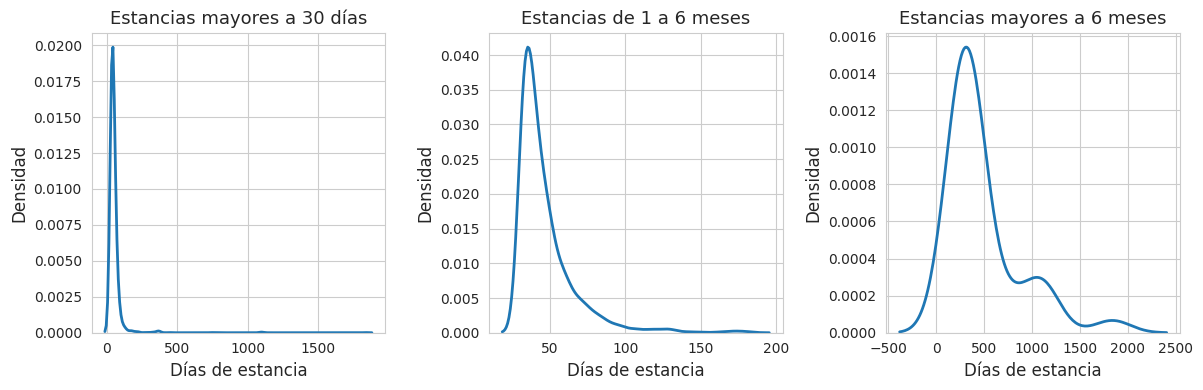

In [ ]:
# Crea una figura con tres subplots en una sola fila
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Grafica el primer kdeplot en el primer subplot
sns.kdeplot(data=egresos[egresos['DIAS_ESTA']>30].DIAS_ESTA, ax=axes[0])

# Grafica el segundo kdeplot en el segundo subplot
sns.kdeplot(data=egresos[(egresos['DIAS_ESTA']>30) & (egresos['DIAS_ESTA']<=183)].DIAS_ESTA, ax=axes[1])

# Grafica el tercer kdeplot en el tercer subplot
sns.kdeplot(data=egresos[(egresos['DIAS_ESTA']>183)].DIAS_ESTA, ax=axes[2])

# Añade los títulos a cada subplot
axes[0].set_title('Estancias mayores a 30 días')
axes[1].set_title('Estancias de 1 a 6 meses')
axes[2].set_title('Estancias mayores a 6 meses')

#Cambiar etiquetas de ejes
axes[0].set_xlabel('Días de estancia')
axes[1].set_xlabel('Días de estancia')
axes[2].set_xlabel('Días de estancia')
axes[0].set_ylabel('Densidad')
axes[1].set_ylabel('Densidad')
axes[2].set_ylabel('Densidad')

# Ajusta el diseño de los subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()


### Boxplots

#### Distribución de estancia, edad, afecciones y procedimientos por motivo de egreso

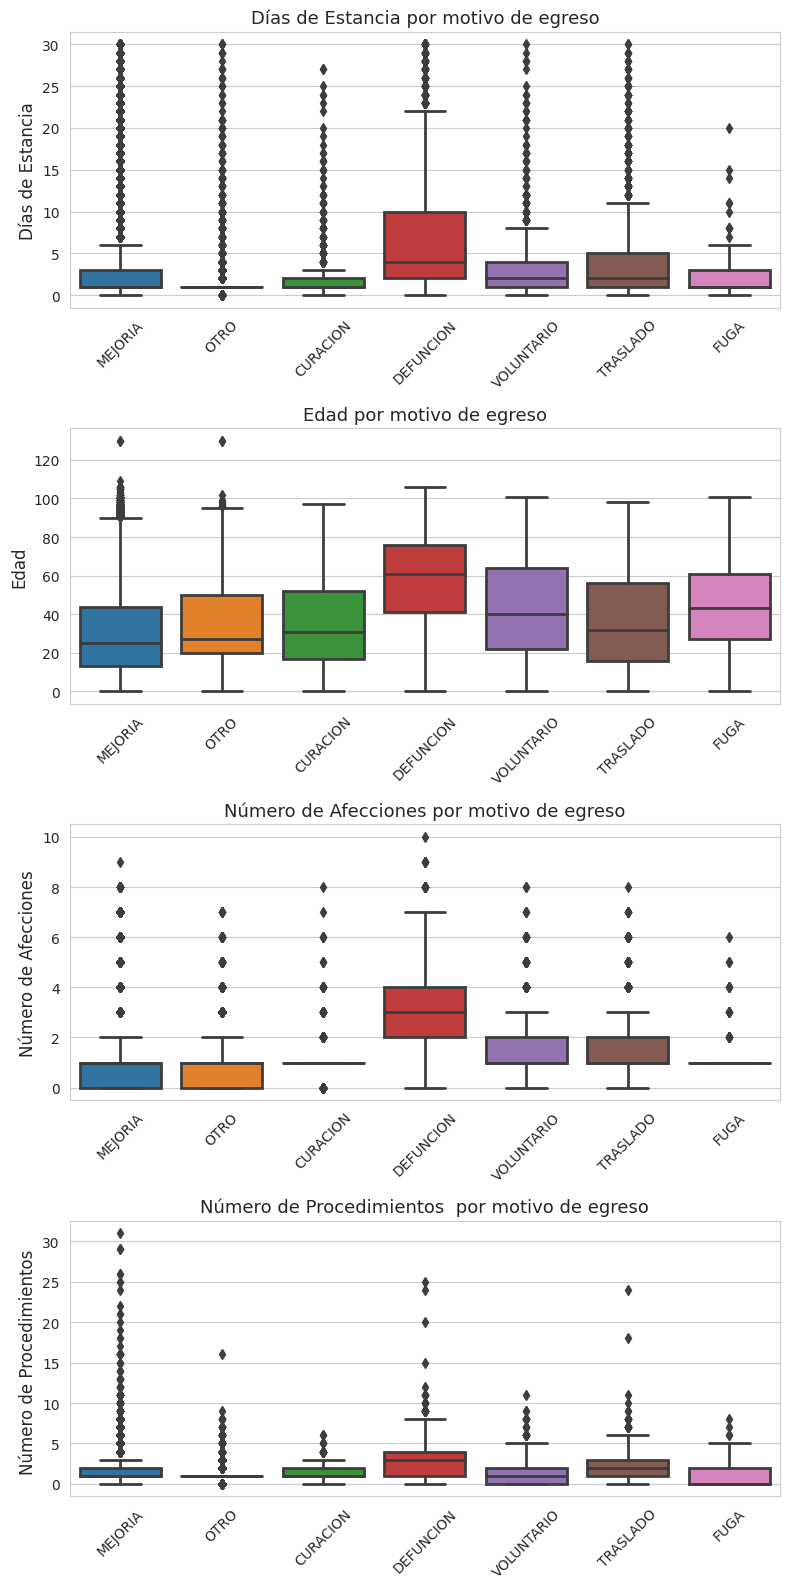

In [ ]:
variables = ['DIAS_ESTA', 'EDAD', 'NUMAFEC', 'NUMPROMED']

# Diccionario de nombres de etiquetas personalizados
etiquetas = {
    'DIAS_ESTA': 'Días de Estancia',
    'EDAD': 'Edad',
    'NUMAFEC': 'Número de Afecciones',
    'NUMPROMED': 'Número de Procedimientos '
}

# Configurar la figura y los ejes
fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)))

# Recorrer las variables
for i, variable in enumerate(variables):
    ax = axes[i]

    # Crear el boxplot
    sns.boxplot(x='MOTEGRE', y=variable, data=egresos2, ax=ax)

    # Establecer el título y los nombres de los ejes
    ax.set_title(f'{etiquetas.get(variable, variable)} por motivo de egreso')
    ax.set_xlabel('')
    ax.set_ylabel(etiquetas.get(variable, variable))

    # Customize tick labels
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both')


# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Distribución de estancia y edad por sexo

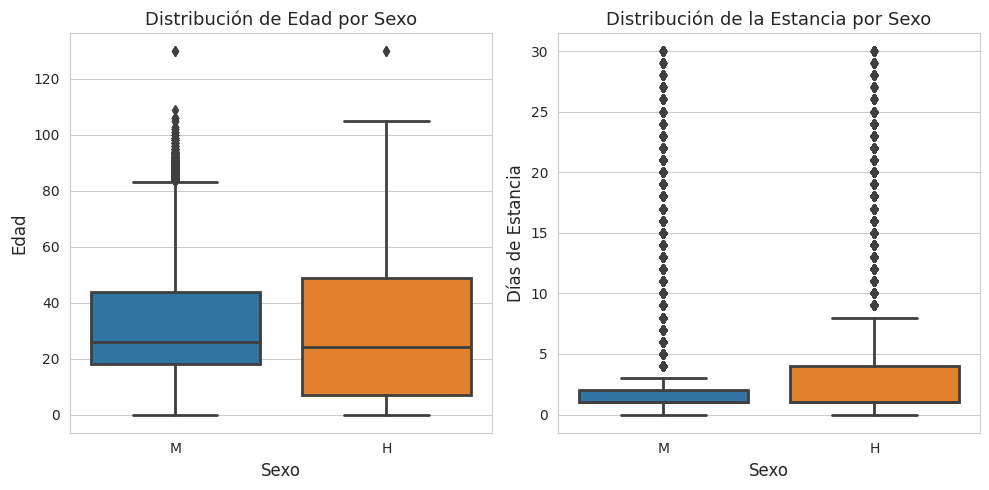

In [ ]:
# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Customize the box plots
sns.boxplot(data=egresos2, x='SEXO', y='EDAD', ax=axs[0])
sns.boxplot(data=egresos2, x="SEXO", y="DIAS_ESTA", ax=axs[1])

# Set titles and labels
axs[0].set_title('Distribución de Edad por Sexo')
axs[0].set_xlabel('Sexo')
axs[0].set_ylabel('Edad')
axs[1].set_title('Distribución de la Estancia por Sexo')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Días de Estancia')

# Adjust spacing and layout
plt.tight_layout()

# Display the plots
plt.show()


#### Distribución de número de comorbilidades por edad y estancia

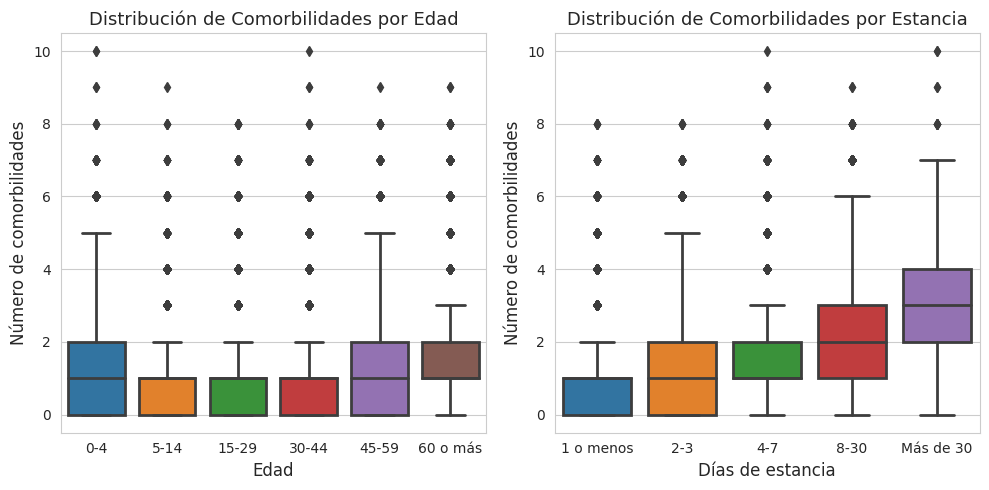

In [ ]:
# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Customize the box plots
sns.boxplot(data=egresos, x='CAT_EDAD', y='NUMAFEC', ax=axs[0])
sns.boxplot(data=egresos, x="CAT_DIASESTA", y="NUMAFEC", ax=axs[1])

# Set titles and labels
axs[0].set_title('Distribución de Comorbilidades por Edad')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Número de comorbilidades')
axs[1].set_title('Distribución de Comorbilidades por Estancia')
axs[1].set_xlabel('Días de estancia')
axs[1].set_ylabel('Número de comorbilidades')

# Adjust spacing and layout
plt.tight_layout()

# Display the plots
plt.show()


### Gráfico de área

#### Pacientes por grupos de edad y sexo

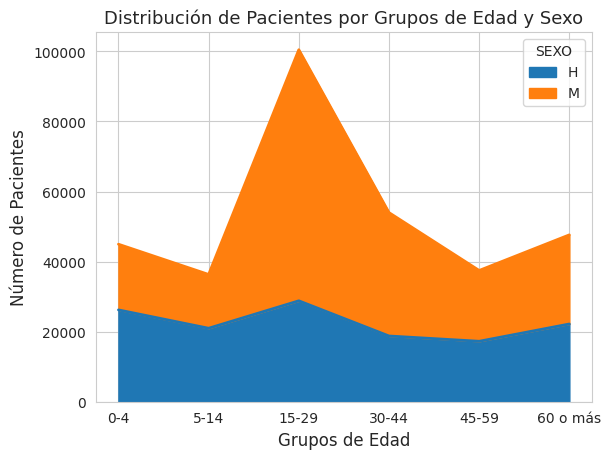

In [ ]:
# Area plot
df = egresos[~(egresos['SEXO']=='NE')]
age_counts = df.groupby(['CAT_EDAD', 'SEXO']).size().unstack()
age_counts.plot.area()
plt.xlabel('Grupos de Edad')
plt.ylabel('Número de Pacientes')
plt.title('Distribución de Pacientes por Grupos de Edad y Sexo')
plt.show()

## Correlación

### Heatmap

#### Correlación entre variables numéricas de Egresos

<ipython-input-50-e502eea76d26>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = egresos.corr()


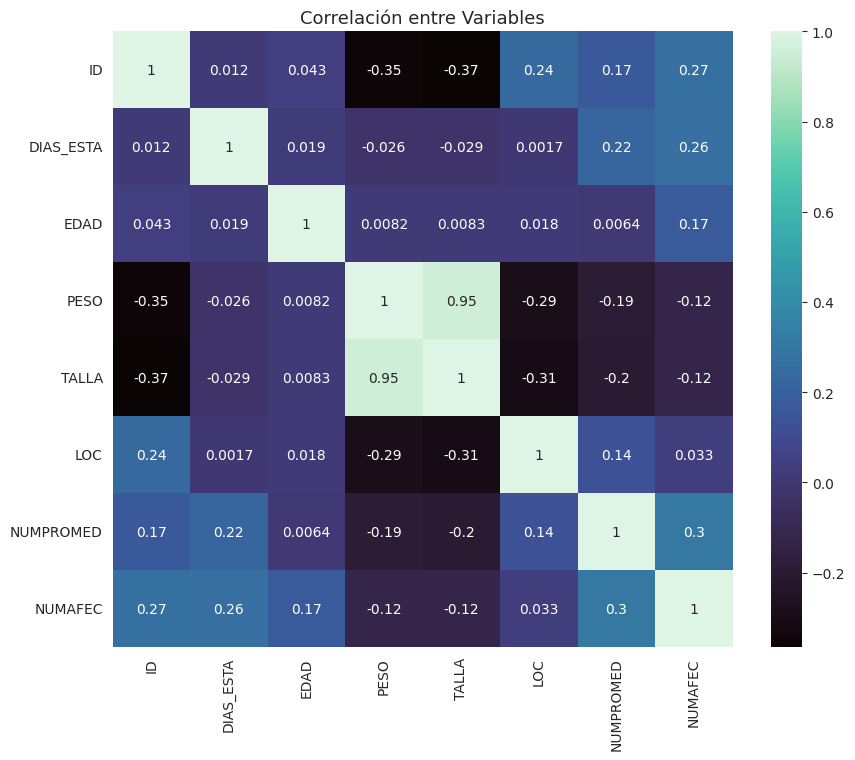

In [ ]:
# Heatmap
plt.figure(figsize=(10,8))
corr = egresos.corr()
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlación entre Variables')
plt.show()

<ipython-input-51-071a3457ef10>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = egresos2.corr()


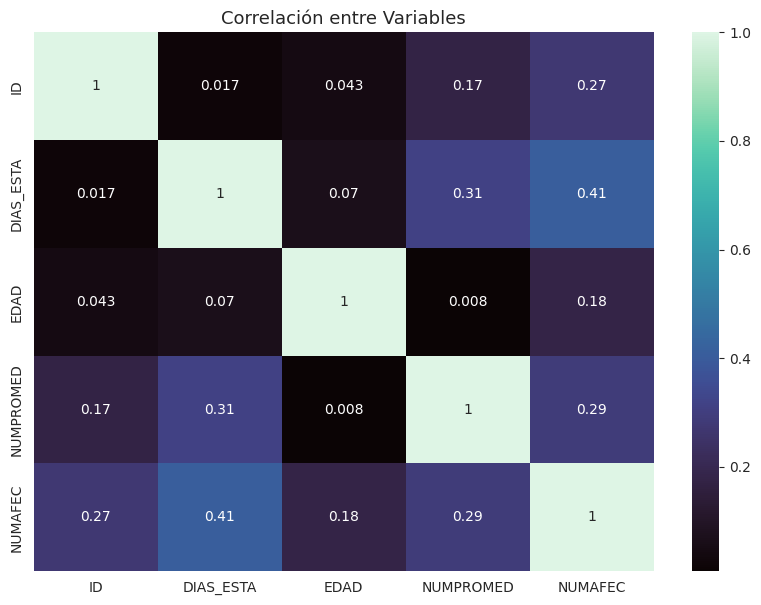

In [ ]:
# Heatmap
plt.figure(figsize=(10,7))
corr = egresos2.corr()
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlación entre Variables')
plt.show()

## Evolución

### Gráfico de líneas

#### Número de egresos cada año por hospital

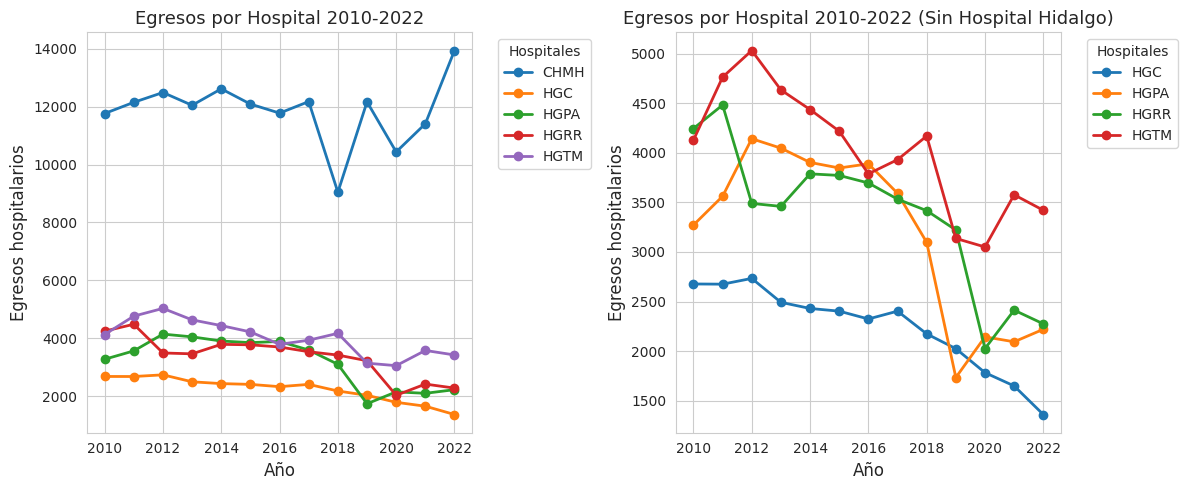

In [ ]:
df = pd.crosstab(index=egresos['EGRESO'].dt.year, columns=egresos['CLUES'], margins=False)

df2 = egresos[~(egresos['CLUES'] == 'CENTENARIO HOSPITAL MIGUEL HIDALGO')]
df2 = pd.crosstab(index=df2['EGRESO'].dt.year, columns=df2['CLUES'], margins=False)

# Configurar la figura y los ejes de subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el primer DataFrame
df.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Egresos hospitalarios')
axes[0].set_title('Egresos por Hospital 2010-2022')

# Mover la leyenda fuera de la gráfica y cambiar los nombres de las leyendas
axes[0].legend(labels=['CHMH', 'HGC', 'HGPA', 'HGRR', 'HGTM'], title='Hospitales', bbox_to_anchor=(1.05, 1), loc='upper left')

# Graficar el segundo DataFrame
df2.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Egresos hospitalarios')
axes[1].set_title('Egresos por Hospital 2010-2022 (Sin Hospital Hidalgo)')

# Mover la leyenda fuera de la gráfica y cambiar los nombres de las leyendas
axes[1].legend(labels=['HGC', 'HGPA', 'HGRR', 'HGTM'], title='Hospitales', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Egresos cada año por derechohabiencia

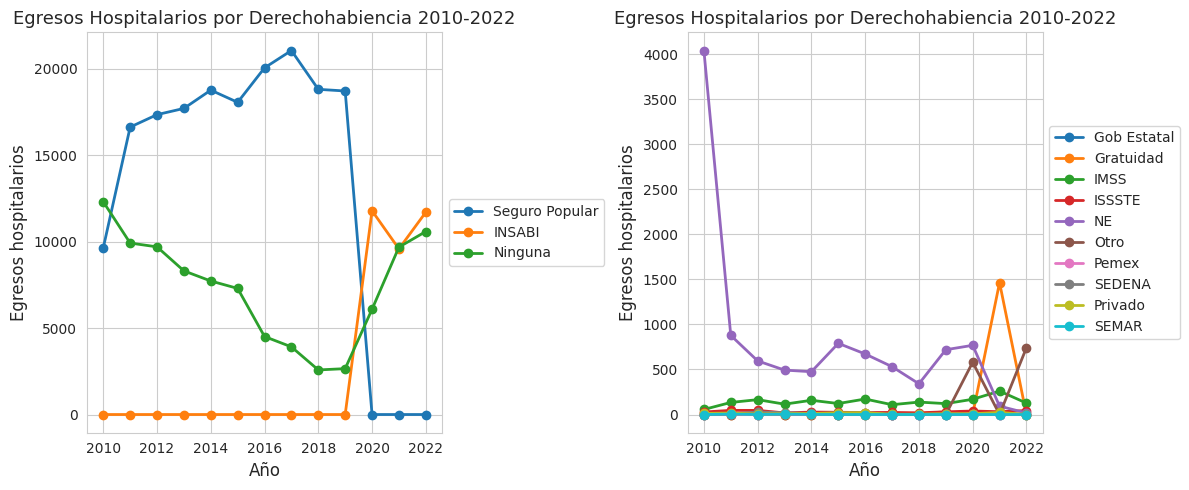

In [ ]:
df = pd.crosstab(index=egresos['EGRESO'].dt.year, columns=egresos['DERHAB'], margins=False)
df = df[['SEGURO POPULAR', 'INSABI', 'NINGUNA']]

# Configurar la figura y los ejes de subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el primer DataFrame
df.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Egresos hospitalarios')
axes[0].set_title('Egresos Hospitalarios por Derechohabiencia 2010-2022')
axes[0].legend(labels=['Seguro Popular', 'INSABI', 'Ninguna'], loc='center left', bbox_to_anchor=(1, 0.5))

df = egresos[~(egresos['DERHAB'].isin(['SEGURO POPULAR', 'INSABI', 'NINGUNA']))]
df = pd.crosstab(index=df['EGRESO'].dt.year, columns=df['DERHAB'], margins=False)

# Graficar el segundo DataFrame
df.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Egresos hospitalarios')
axes[1].set_title('Egresos Hospitalarios por Derechohabiencia 2010-2022')
axes[1].legend(labels=['Gob Estatal', 'Gratuidad', 'IMSS', 'ISSSTE',
                       'NE', 'Otro', 'Pemex', 'SEDENA', 'Privado', 'SEMAR'], loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Tipo de procedimientos médicos por año

<Figure size 800x600 with 0 Axes>

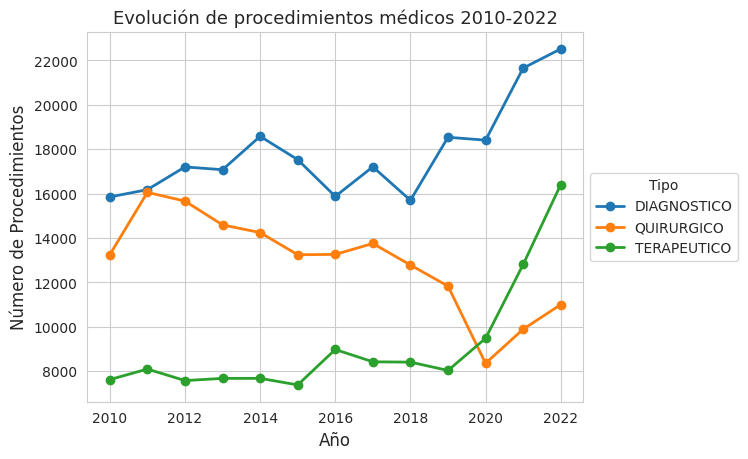

In [ ]:
anios = egresos[['ID', 'EGRESO']]
df = procedimientos.merge(anios, how='left', on='ID')
df['EGRESO'] = df['EGRESO'].dt.year
df = df[['TIPO', 'EGRESO']]
df = df[~(df['TIPO']=='MIXTO')]

# Calcular el número de procedimientos por año y por tipo
count_data = df.groupby(['EGRESO', 'TIPO']).size().unstack()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))
count_data.plot(kind='line', marker='o')
plt.title('Evolución de procedimientos médicos 2010-2022')
plt.xlabel('Año')
plt.ylabel('Número de Procedimientos')
plt.legend(title='Tipo', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#### Promedio de tiempo en quirófano por año

<ipython-input-25-a52c978f2088>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['TIEMPO'] = combined_data['QH'] * 60 + combined_data['QM']


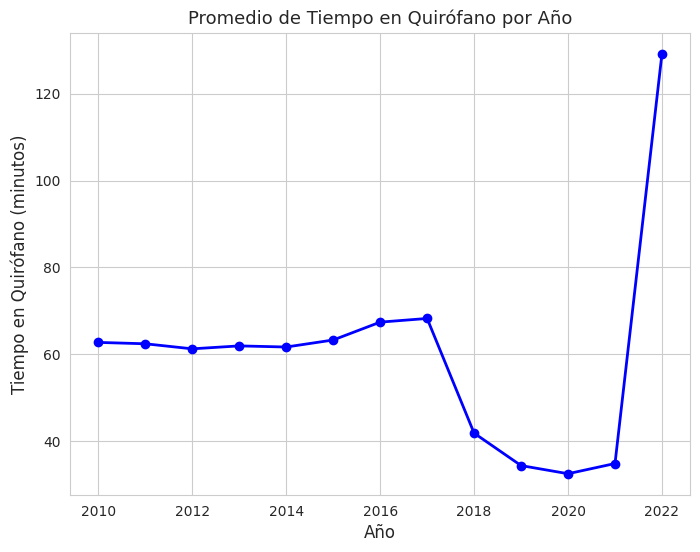

In [ ]:
# Combinar los datos relevantes de los datasets
combined_data = pd.merge(egresos[['ID', 'EGRESO']], procedimientos[['ID', 'QH', 'QM', 'QUIROF']], on='ID')
combined_data.drop(combined_data[combined_data['QH']==99].index, inplace = True)
combined_data.drop(combined_data[combined_data['QH']==88].index, inplace = True)

# Extraer el año de la fecha de egreso
combined_data['AÑO'] = pd.to_datetime(combined_data['EGRESO']).dt.year
combined_data = combined_data[combined_data['QUIROF']=='EN']
#combined_data.loc[(combined_data['AÑO'] == 2022) & (combined_data['QH'] > 8), 'QH'] = 1
combined_data['TIEMPO'] = combined_data['QH'] * 60 + combined_data['QM']
# Calcular el promedio de tiempo en quirófano por año
average_time = combined_data.groupby(['AÑO'])['TIEMPO'].mean()

# Crear un gráfico de línea
plt.figure(figsize=(8, 6))
average_time.plot(kind='line', marker='o', color='blue')
plt.title('Promedio de Tiempo en Quirófano por Año')
plt.xlabel('Año')
plt.ylabel('Tiempo en Quirófano (minutos)')
plt.show()


In [ ]:
df = egresos[egresos['EGRESO'].dt.year==2022]
df_proc = procedimientos[procedimientos['ID'].isin(df['ID'])]
df_proc = df_proc[(df_proc['QH']==11) & (df_proc['TIPO']=='QUIRURGICO')]
df_proc

ID  NUMPROMED        TIPO  \
475233  301331          1  QUIRURGICO   
475234  301332          1  QUIRURGICO   
475235  301333          1  QUIRURGICO   
475259  301339          1  QUIRURGICO   
475272  301345          1  QUIRURGICO   
...        ...        ...         ...   
518843  320997          1  QUIRURGICO   
518844  320997          2  QUIRURGICO   
518847  320997          5  QUIRURGICO   
518868  321002          1  QUIRURGICO   
518869  321002          2  QUIRURGICO   

                                                   PROMED     ANEST QUIROF  \
475233                                    COLECISTECTOMÍA   GENERAL     EN   
475234                                    COLECISTECTOMÍA   GENERAL     EN   
475235                                    COLECISTECTOMÍA   GENERAL     EN   
475259                          OTRA REPARACIÓN DE HERNIA   GENERAL     EN   
475272                                    COLECISTECTOMÍA   GENERAL     EN   
...                                                   ...       ...    ...   
518843  OTRA DESTRUCCIÓN U OCLUSIÓN BILATERAL DE LAS T...  REGIONAL     EN   
518844                               CESÁREA CLÁSICA BAJA  REGIONAL     EN   
518847  OTRA DESTRUCCIÓN U OCLUSIÓN BILATERAL DE LAS T...  REGIONAL     EN   
518868  OTRA DESTRUCCIÓN U OCLUSIÓN BILATERAL DE LAS T...  REGIONAL     EN   
518869                               CESÁREA CLÁSICA BAJA  REGIONAL     EN   

          QH    QM  
475233  11.0  11.0  
475234  11.0  11.0  
475235  11.0  11.0  
475259  11.0  11.0  
475272  11.0  11.0  
...      ...   ...  
518843  11.0  43.0  
518844  11.0  43.0  
518847  11.0  43.0  
518868  11.0  22.0  
518869  11.0  22.0  

[129 rows x 8 columns]

In [ ]:
df = combined_data[(combined_data['AÑO']==2020)&(combined_data['QH']==0)]['QM'].value_counts()
df

0.0     4489
30.0     326
40.0      94
20.0      75
10.0      32
50.0      23
15.0      12
45.0      10
5.0        7
59.0       4
3.0        3
38.0       3
25.0       2
48.0       1
32.0       1
35.0       1
Name: QM, dtype: int64

####Evolución de las principales afecciones

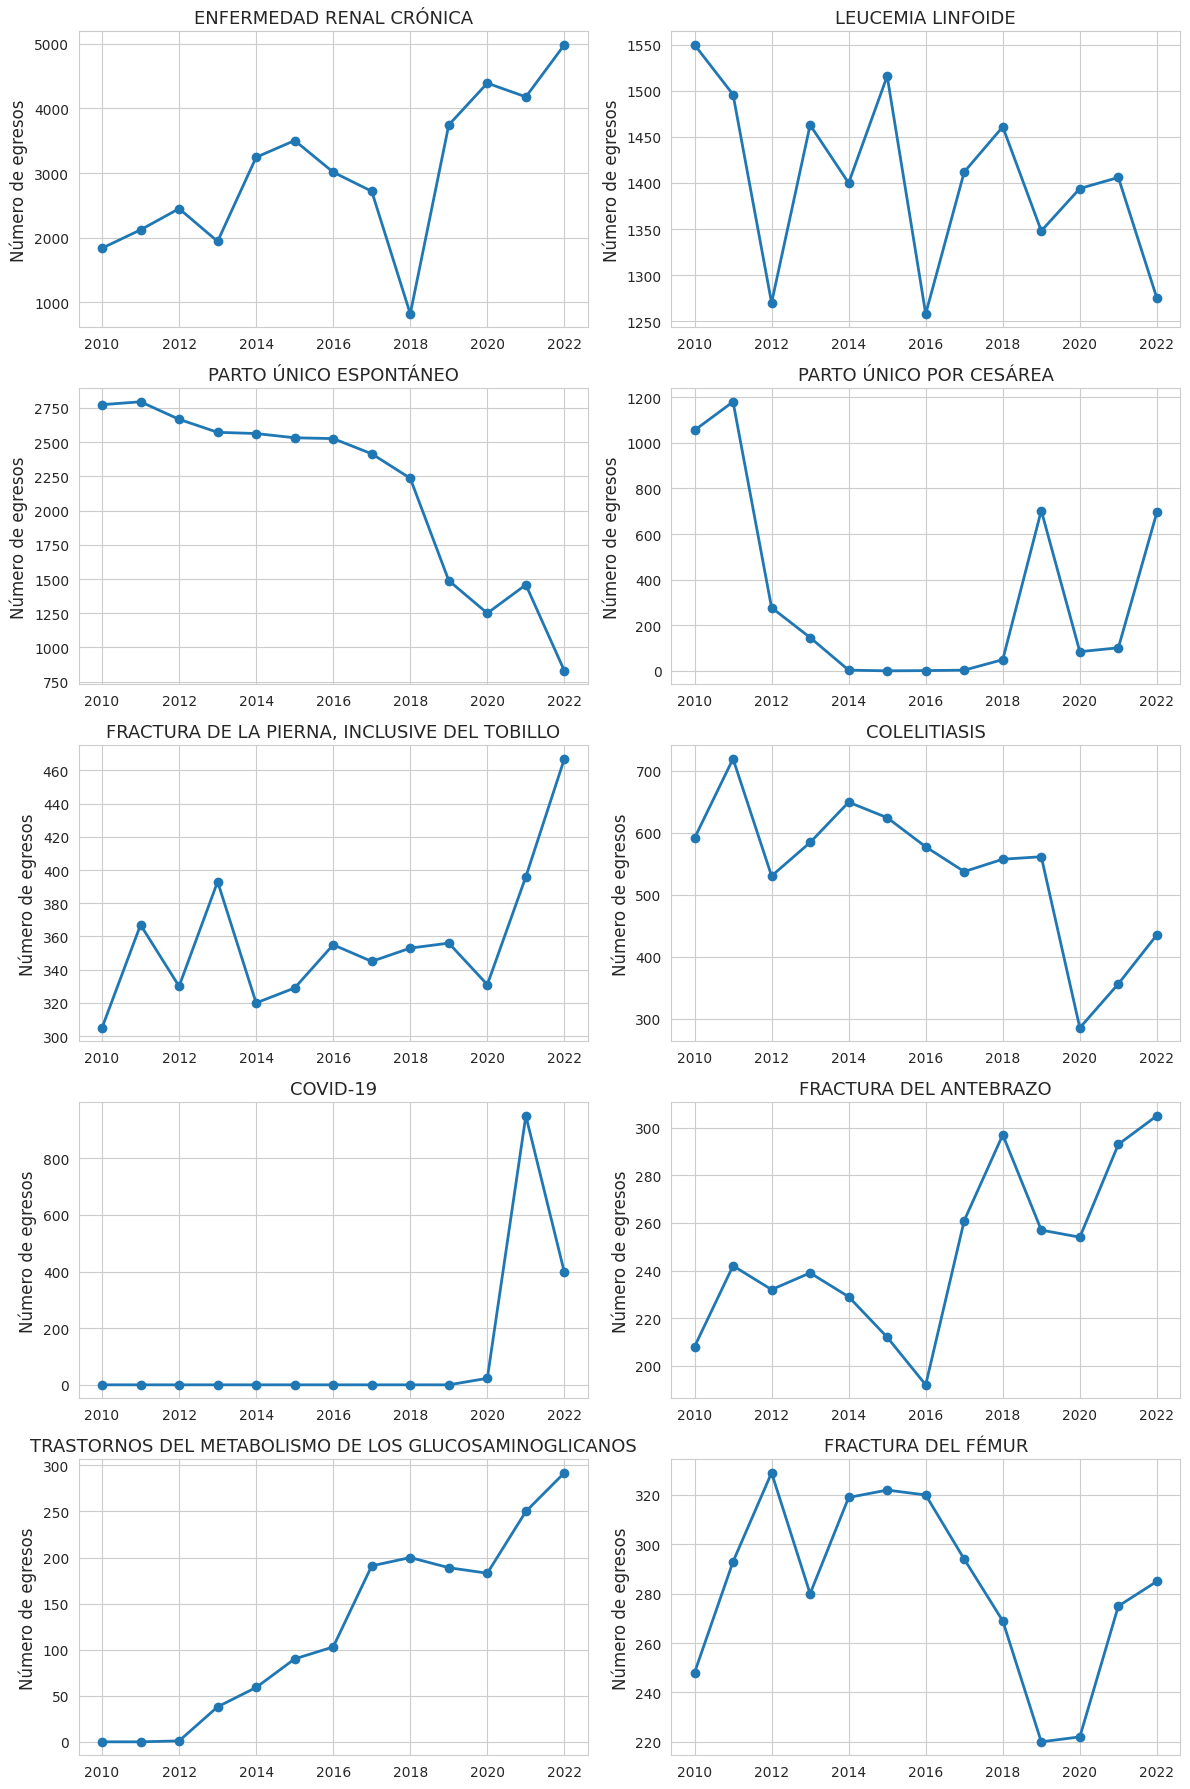

In [52]:
df = egresos.copy()
df['ANIO'] = df['EGRESO'].dt.year
df_2022 = df[df['ANIO'] == 2022]
top_10_afecprin = df_2022['AFECPRIN'].value_counts().nlargest(10).index.tolist()

# Crear el diccionario donde la clave es la afección principal y los valores son listas con el número de casos por cada año del 2010 al 2022
data_dict = {}
for afecprin in top_10_afecprin:
    data_dict[afecprin] = [df[(df['ANIO'] == year) & (df['AFECPRIN'] == afecprin)].shape[0] for year in range(2010, 2023)]

# Crea la figura con 5 filas y 2 columnas
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Itera sobre las afecciones principales y las gráficas correspondientes
for i, afecprin in enumerate(top_10_afecprin):
    # Obtiene los años y los datos correspondientes a la afección principal desde el diccionario
    years = list(range(2010, 2023))
    data = data_dict[afecprin]

    # Calcula la posición de la gráfica en la figura
    row = i // 2
    col = i % 2

    # Grafica la evolución de la afección principal
    axes[row, col].plot(years, data, marker='o')
    axes[row, col].set_title(afecprin)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Número de egresos')

# Ajusta los espacios entre las gráficas y muestra la figura
plt.tight_layout()
plt.show()


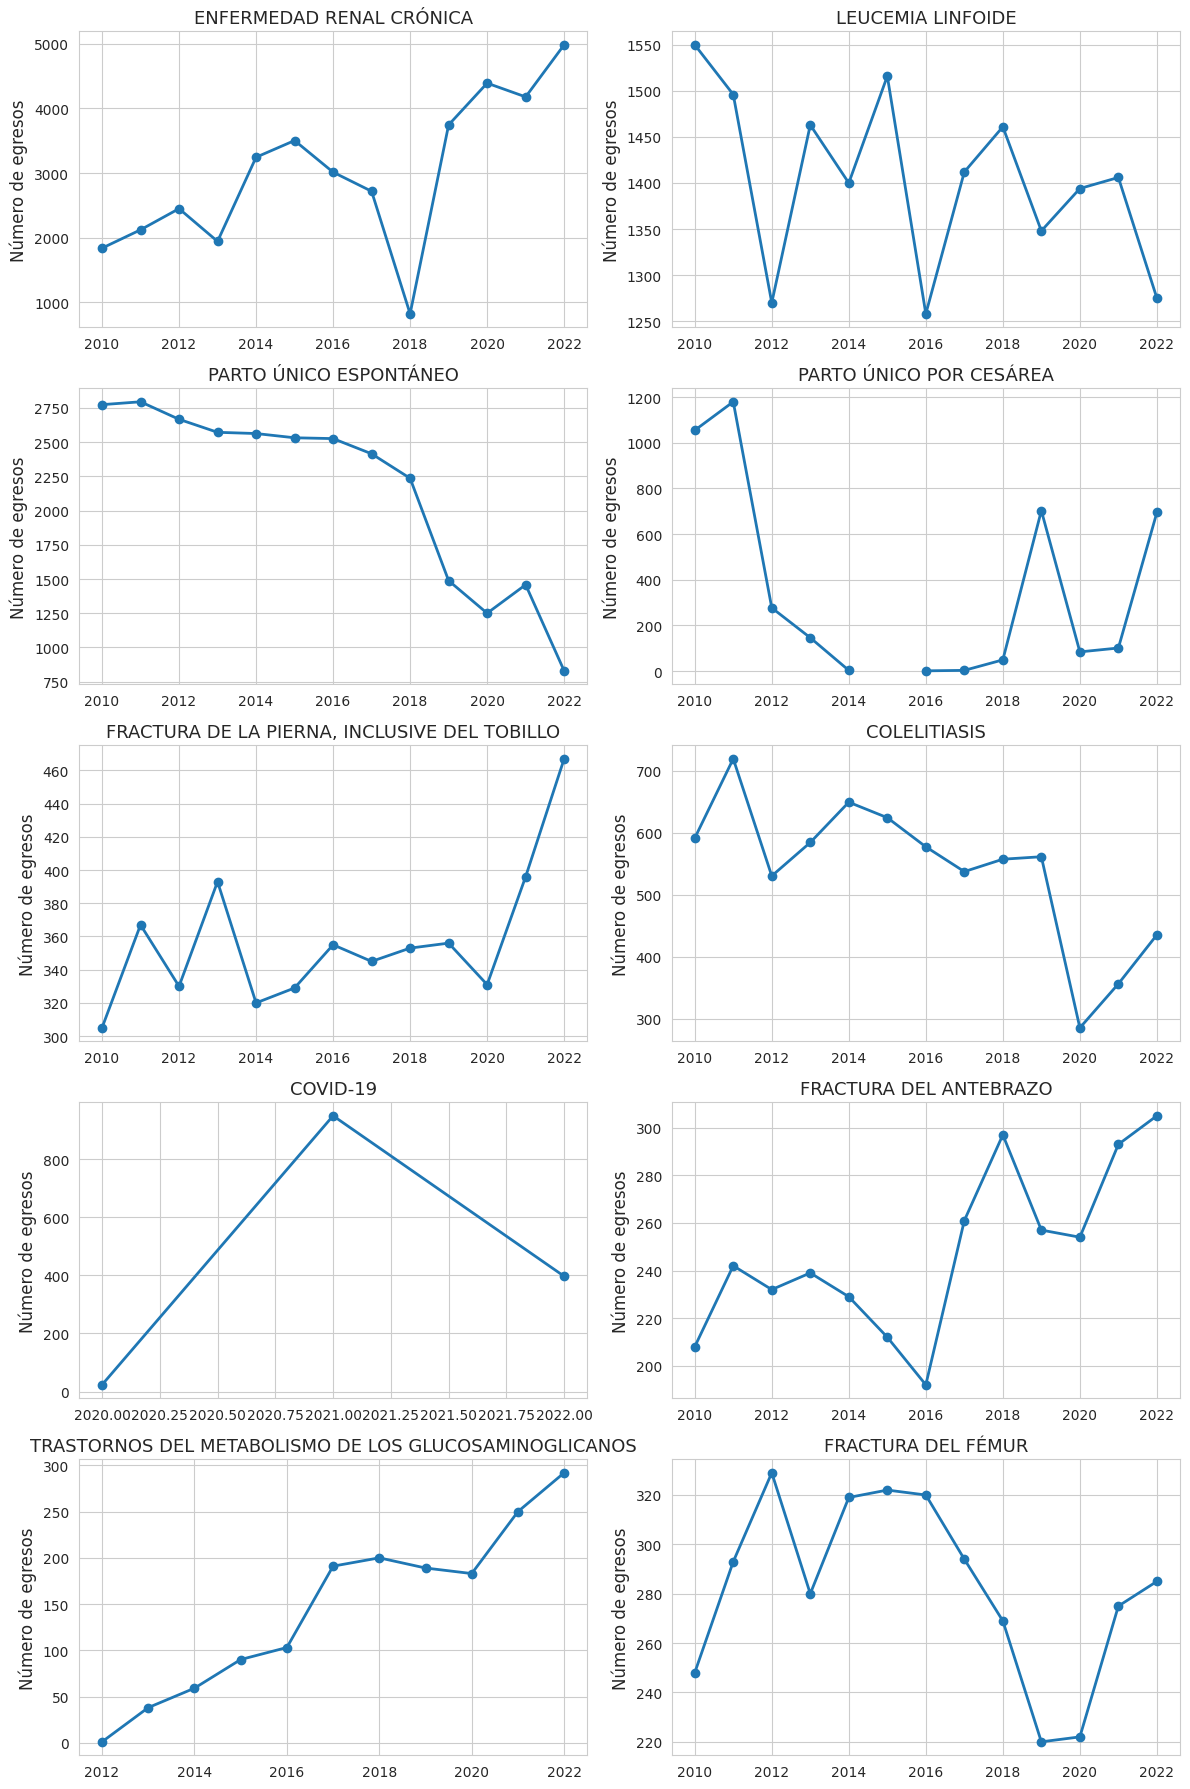

In [51]:
df = egresos.copy()
df['ANIO'] = df['EGRESO'].dt.year
df_2022 = df[df['ANIO'] == 2022]
top_10_afecprin = df_2022['AFECPRIN'].value_counts().nlargest(10).index.tolist()

grouped_data = df.groupby(['ANIO', 'AFECPRIN']).size().unstack()

# Crear el diccionario donde la clave es la afección principal y los valores son listas con el número de casos por cada año del 2010 al 2022
data_dict = {}
for afecprin in top_10_afecprin:
    data_dict[afecprin] = [grouped_data.loc[year, afecprin] if year in grouped_data.index else 0 for year in range(2010, 2023)]

# Crea la figura con 5 filas y 2 columnas
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Itera sobre las afecciones principales y las gráficas correspondientes
for i, afecprin in enumerate(top_10_afecprin):
    # Obtiene los años y los datos correspondientes a la afección principal desde el diccionario
    years = list(range(2010, 2023))
    data = data_dict[afecprin]

    # Calcula la posición de la gráfica en la figura
    row = i // 2
    col = i % 2

    # Grafica la evolución de la afección principal
    axes[row, col].plot(years, data, marker='o')
    axes[row, col].set_title(afecprin)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Número de egresos')

# Ajusta los espacios entre las gráficas y muestra la figura
plt.tight_layout()
plt.show()


## Mapas

#### Egresos Hospitalarios por Municipio

In [ ]:
# Cargar el archivo de shapefile del mapa de Aguascalientes
map_df = gpd.read_file('/content/gdrive/MyDrive/Colab Notebooks/Bootcamp - Ciencia de Datos/PROYECTO/Proyecto_Graficas/Bases/geograficos/ags_municipio.shp')

In [ ]:
# Renombrar la columna de municipios para que coincida con la de Egresos
map_df.rename(columns={'NOMGEO':'MUNIC'}, inplace = True)
map_df['MUNIC'] = map_df['MUNIC'].str.upper()
map_df['MUNIC'] = map_df['MUNIC'].replace({'RINCÓN DE ROMOS':'RINCON DE ROMOS',
                                           'SAN JOSÉ DE GRACIA': 'SAN JOSE DE GRACIA',
                                           'JESÚS MARÍA': 'JESUS MARIA',
                                           'TEPEZALÁ': 'TEPEZALA',
                                           'PABELLÓN DE ARTEAGA': 'PABELLON DE ARTEAGA',
                                           'COSÍO': 'COSIO'
                                           })
map_df.head()

CVEGEO CVE_ENT CVE_MUN                      MUNIC  \
0  01002      01     002                   ASIENTOS   
1  01011      01     011  SAN FRANCISCO DE LOS ROMO   
2  01007      01     007            RINCON DE ROMOS   
3  01008      01     008         SAN JOSE DE GRACIA   
4  01005      01     005                JESUS MARIA   

                                            geometry  
0  POLYGON ((-102.05121 22.29121, -102.05041 22.2...  
1  POLYGON ((-102.15100 22.08859, -102.15000 22.0...  
2  POLYGON ((-102.22661 22.37380, -102.22517 22.3...  
3  POLYGON ((-102.45537 22.31212, -102.45501 22.3...  
4  POLYGON ((-102.33348 22.05020, -102.33189 22.0...

In [ ]:
# Calcular el número de egresos por municipio
egresos_por_municipio = egresos['MUNIC'].value_counts().reset_index()
egresos_por_municipio.columns=['MUNIC', 'EGRESOS']
# Fusionar los datos de egresos con los datos de los municipios
datos_egresos = map_df.merge(egresos_por_municipio, on='MUNIC', how='left')

<ipython-input-60-e3f33efe633a>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(datos_egresos.geometry.centroid.x, datos_egresos.geometry.centroid.y, datos_egresos['EGRESOS']):


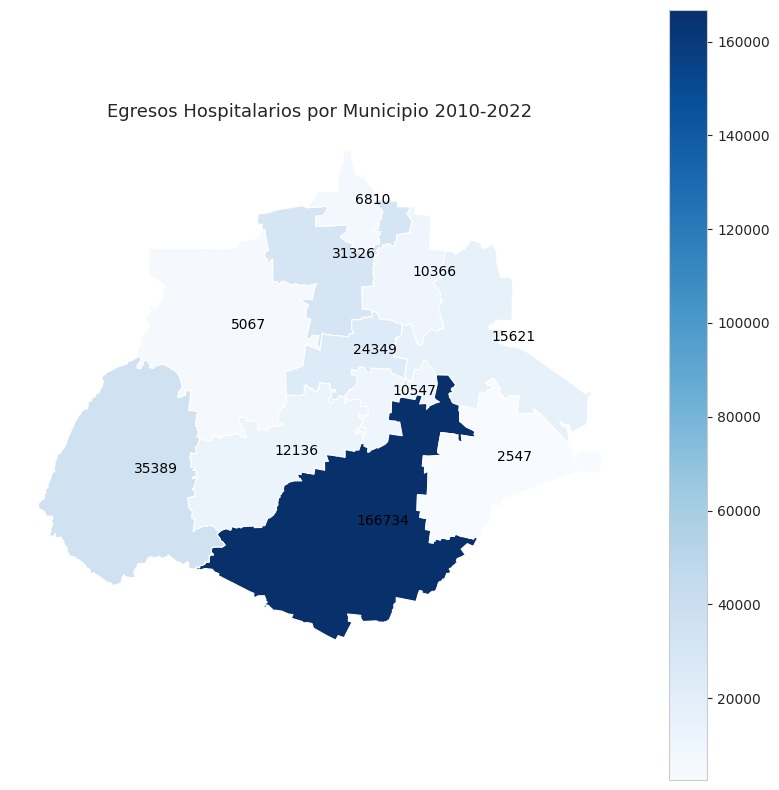

In [ ]:
# Crear una visualización del mapa con tonos distintos de azul
fig, ax = plt.subplots(figsize=(10, 10))
datos_egresos.plot(column='EGRESOS', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='1', legend=True)

# Agregar el número de egresos por municipio
for x, y, label in zip(datos_egresos.geometry.centroid.x, datos_egresos.geometry.centroid.y, datos_egresos['EGRESOS']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color='black', fontsize=10)

# Configurar el título y mostrar el gráfico
ax.grid(False)
ax.axis('off')
ax.set_title('Egresos Hospitalarios por Municipio 2010-2022')
plt.show()


## Conteos

### Gráfico de barras apiladas

#### Municipio de procedencia del paciente atendido por cada hospital

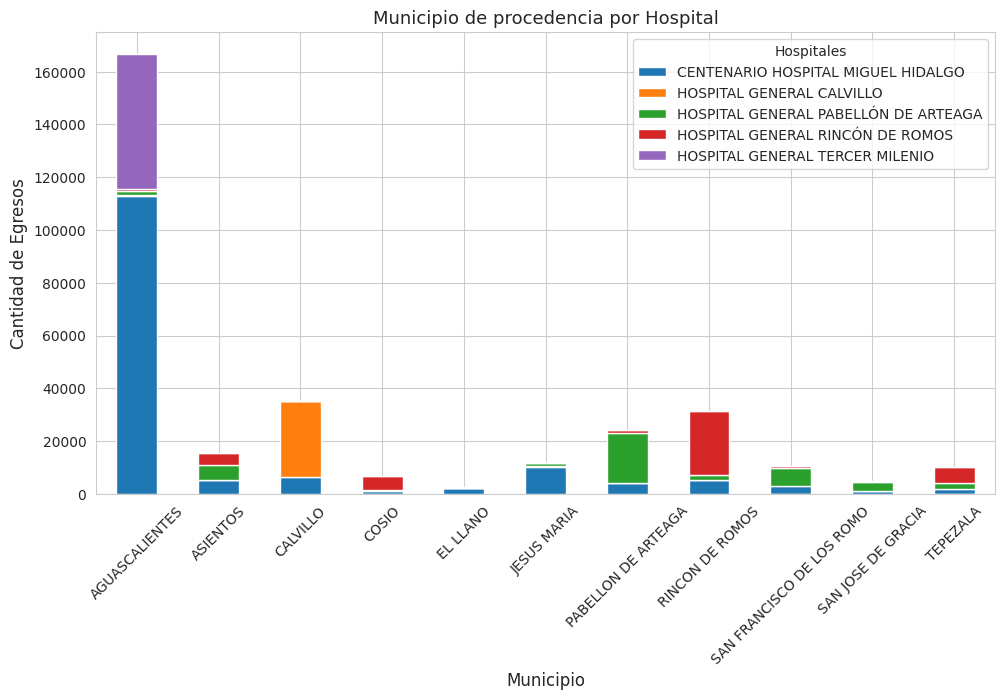

In [ ]:
df = egresos[egresos['MUNIC']!='NE']
plot = pd.crosstab(index=df['MUNIC'], columns=df['CLUES']).plot(kind='bar', stacked=True)

# Configuración de la figura
plt.title('Municipio de procedencia por Hospital')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de Egresos')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11.6, 6)

# Configuración de las leyendas
plt.legend(title='Hospitales', loc='upper right')

plt.show()


### Gráfico de barras

#### Motivo de egreso por hospital (excluyendo Mejoría)

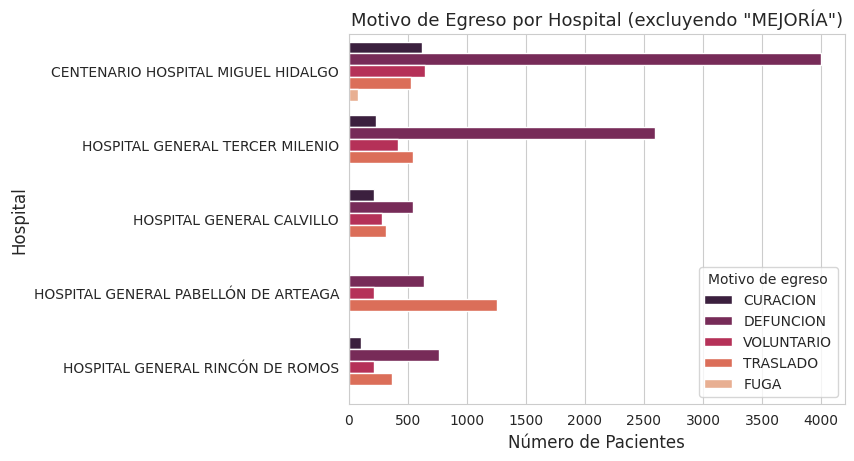

In [ ]:
# Gráfico de barras
df = egresos[~(egresos['MOTEGRE'].isin(['MEJORIA', 'OTRO', 'NE']))]
sns.countplot(y='CLUES', data=df, palette = 'rocket', hue = 'MOTEGRE', orient = 'h')
plt.title('Motivo de Egreso por Hospital (excluyendo "MEJORÍA")')
plt.ylabel('Hospital')
plt.xlabel('Número de Pacientes')
plt.legend(title = 'Motivo de egreso')
#plt.xticks(rotation=45)
plt.show()

#### Infecciones por hospital

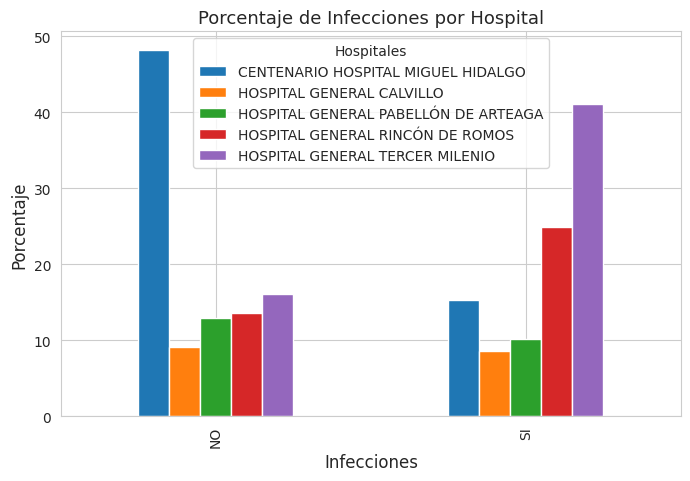

In [ ]:
df = egresos[egresos['INFEC'] != 'NE']
plot = pd.crosstab(index=df['INFEC'], columns=df['CLUES']).apply(lambda r: r/r.sum() * 100, axis=1).plot(kind='bar')

# Configuración de la figura
plt.title('Porcentaje de Infecciones por Hospital')
plt.xlabel('Infecciones')
plt.ylabel('Porcentaje')
plt.gcf().set_size_inches(8, 5)

# Configuración de las leyendas
plt.legend(title='Hospitales')

plt.show()


#### Egresos por procedencia

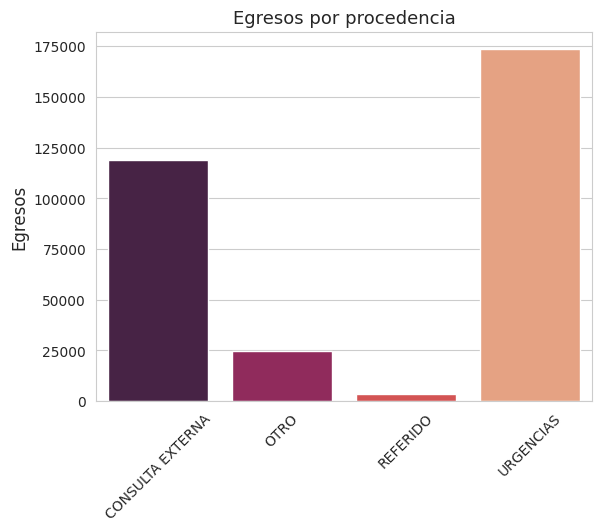

In [ ]:
df = egresos[egresos['PROCED']!='CUNERO PATOLOGICO']
df = df.groupby(['PROCED'])['ID'].count()
df.drop('NE', inplace = True)

#Gráfica
sns.barplot(
    y=df.values,
    x=df.index,
    palette = 'rocket')
plt.title("Egresos por procedencia")
plt.xlabel('')
plt.ylabel('Egresos')
plt.xticks(rotation=45)
plt.show()

#### TOP 10 Diagnóstico Inicial y Afección Principal


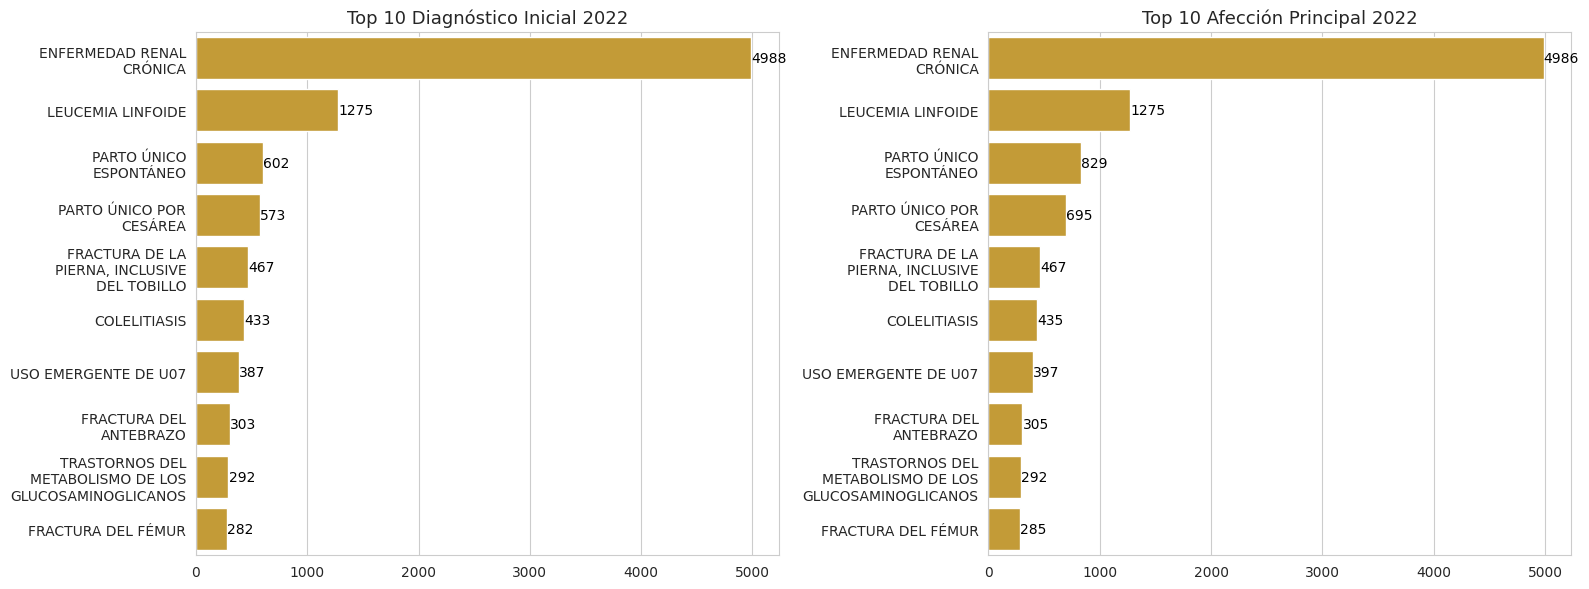

In [ ]:
# Filtrar el top 10 de diagnósticos iniciales
df = egresos.copy()
df = df[df['EGRESO'].dt.year==2022]
top10_diagnostico_ini = df['DIAG_INI'].value_counts().sort_values(ascending=False)[:10]

# Filtrar el top 10 de afecciones principales
top10_afeccion_princ = df['AFECPRIN'].value_counts().sort_values(ascending=False)[:10]

# Configurar la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Top 10 de diagnóstico inicial
sns.barplot(
    x=top10_diagnostico_ini.values,
    y=[textwrap.fill(x, width=20) for x in top10_diagnostico_ini.index],
    color='goldenrod',
    ax=axes[0]
)

axes[0].set_title("Top 10 Diagnóstico Inicial 2022")

# Mostrar los valores en la parte derecha de la gráfica 1
for i, v in enumerate(top10_diagnostico_ini.values):
    axes[0].text(v + 1, i, str(v), color='black', va='center')

# Gráfica 2: Top 10 de afección principal
sns.barplot(
    x=top10_afeccion_princ.values,
    y=[textwrap.fill(x, width=20) for x in top10_afeccion_princ.index],
    color='goldenrod',
    ax=axes[1]
)

axes[1].set_title("Top 10 Afección Principal 2022")

# Mostrar los valores en la parte derecha de la gráfica 2
for i, v in enumerate(top10_afeccion_princ.values):
    axes[1].text(v + 1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


#### TOP10 Afecciones con diagnóstico distinto

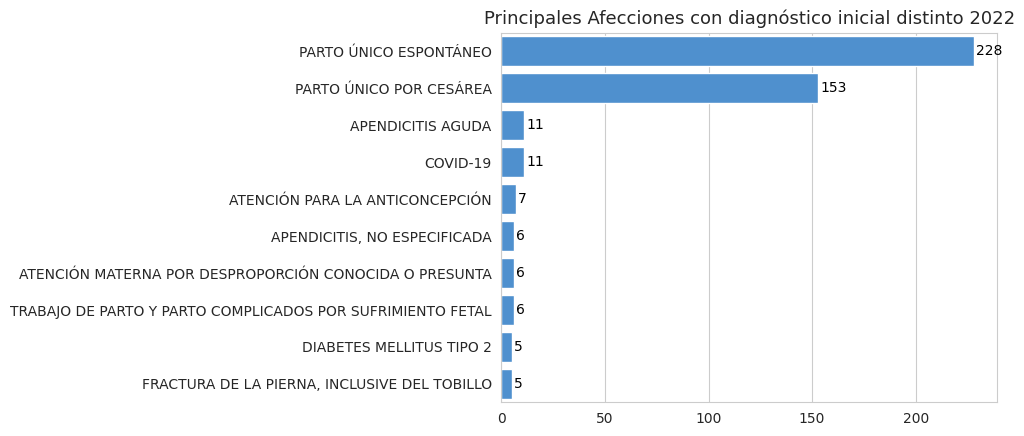

In [48]:
#Afecciones con diagnóstico inicial distinto
df = egresos.copy()
df = df[df['EGRESO'].dt.year ==2022]
bad_diag = df[df['DIAG_INI'] != df['AFECPRIN']]
#Conteo
bad_diag10 = bad_diag.groupby(['AFECPRIN'])['ID'].count().sort_values(ascending = False)[:10]
sns.barplot(
    x=bad_diag10.values,
    y=bad_diag10.index,
    color='#3A90E3')
#Gráfica
plt.title("Principales Afecciones con diagnóstico inicial distinto 2022")
plt.xlabel('')
plt.ylabel('')

# Mostrar los valores en la parte superior de la gráfica
for i, v in enumerate(bad_diag10.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

#### TOP 10 Causa externa de lesión

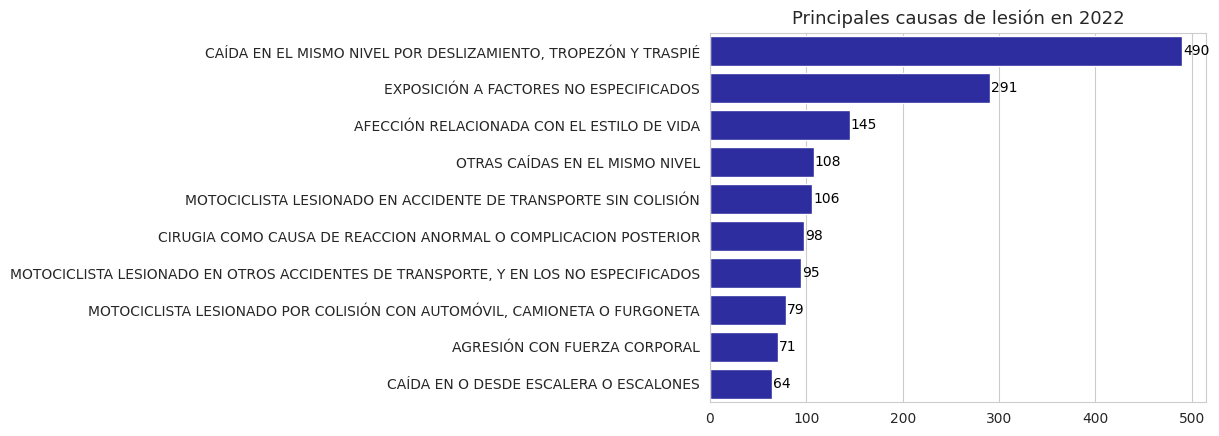

In [45]:
df = egresos[egresos['EGRESO'].dt.year==2022]
causaext = df.copy()
causaext['CAUSAEXT'] = causaext['CAUSAEXT'].replace({'CIRUGÍA Y OTROS PROCEDIMIENTOS QUIRÚRGICOS COMO LA CAUSA DE REACCIÓN ANORMAL DEL PACIENTE O DE COMPLICACIÓN POSTERIOR, SIN MENCIÓN DE INCIDENTE EN EL MOMENTO DE EFECTUAR EL PROCEDIMIENTO':
           'CIRUGIA COMO CAUSA DE REACCION ANORMAL O COMPLICACION POSTERIOR'})
causaext = causaext['CAUSAEXT']
causaext = causaext.value_counts().sort_values(ascending = False)[:10]
sns.barplot(
    x=causaext.values,
    y=causaext.index,
    color='#1A1AB3')

plt.title("Principales causas de lesión en 2022")
plt.xlabel('')
plt.ylabel('')

# Mostrar los valores en la parte superior de la gráfica
for i, v in enumerate(causaext.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

#### TOP10 Causas de morbilidad

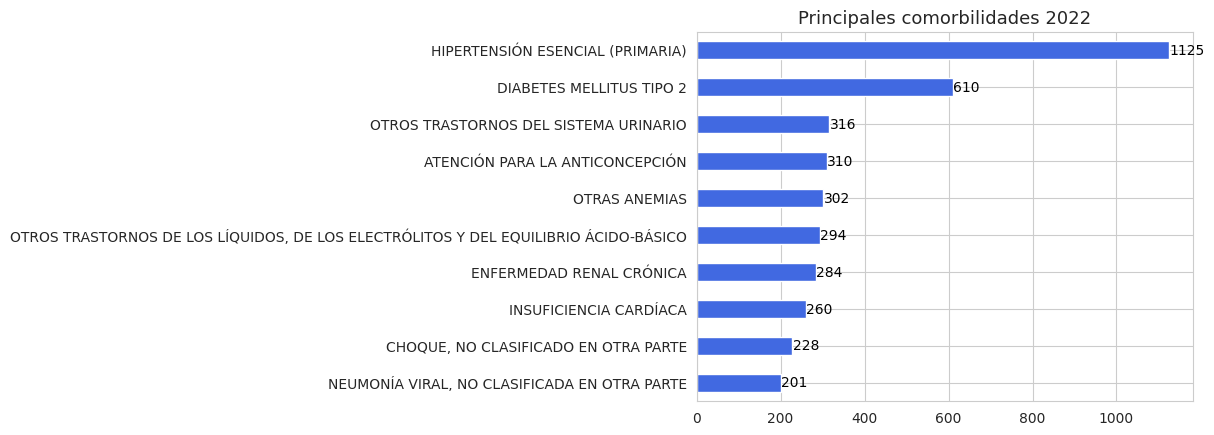

In [46]:
df = egresos[egresos['EGRESO'].dt.year==2022]
df_afec = afecciones[afecciones['ID'].isin(df['ID'])]
df = df_afec['AFEC'].value_counts().sort_values(ascending = False)[1:11]
# Ordenar el DataFrame en orden ascendente
df = df.sort_values(ascending=True)

# Graficar la gráfica de barras horizontal
df.plot(kind='barh', color='#4169E1')

plt.title("Principales comorbilidades 2022")

# Mostrar los valores en la parte superior de la gráfica
for i, v in enumerate(df.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

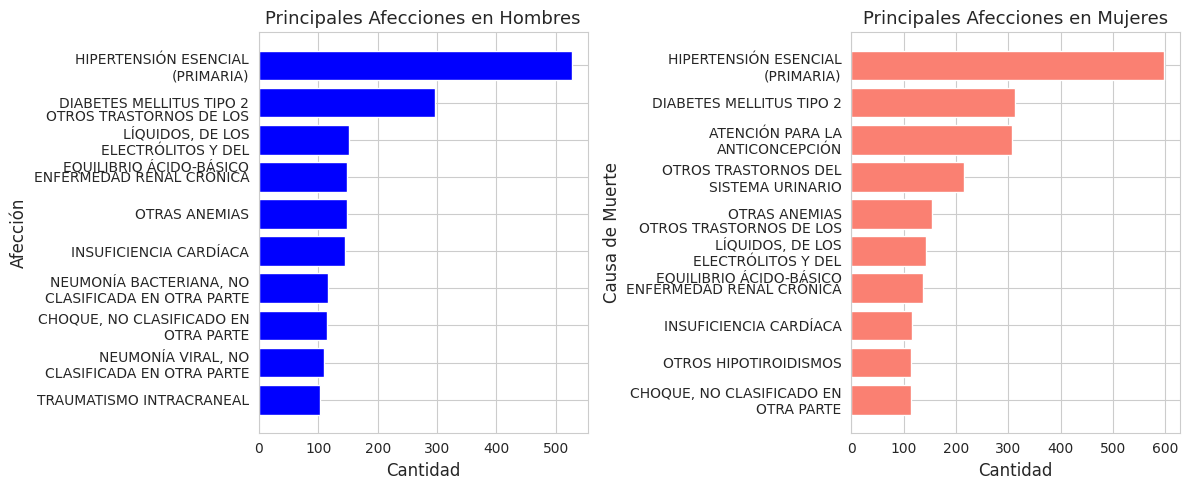

In [30]:
#color = '#0000FF' steelblue
#color = '#FA8072' salmon

df = egresos.copy()
df = df[df['EGRESO'].dt.year==2022]
# Filtrar los registros de hombres
hombres = df[(df['SEXO'] == 'H')]
h_afec = afecciones[afecciones['ID'].isin(hombres['ID'])]
top_10_causas_hombres = h_afec['AFEC'].value_counts().sort_values(ascending = False)[1:11]

# Filtrar los registros de mujeres
mujeres = df[(df['SEXO'] == 'M')]
m_afec = afecciones[afecciones['ID'].isin(mujeres['ID'])]
top_10_causas_mujeres = m_afec['AFEC'].value_counts().sort_values(ascending = False)[1:11]

# Obtener las causas y sus respectivos conteos en hombres
causas_hombres = top_10_causas_hombres.index.tolist()
conteos_hombres = top_10_causas_hombres.values.tolist()

# Obtener las causas y sus respectivos conteos en mujeres
causas_mujeres = top_10_causas_mujeres.index.tolist()
conteos_mujeres = top_10_causas_mujeres.values.tolist()

# Envolver el texto de las afecciones en varias líneas
causas_hombres_wrapped = [textwrap.fill(causa, width=27) for causa in causas_hombres]
causas_mujeres_wrapped = [textwrap.fill(causa, width=27) for causa in causas_mujeres]

# Invertir el orden de los datos para colocar el valor más grande en la parte superior
causas_hombres_wrapped.reverse()
conteos_hombres.reverse()
causas_mujeres_wrapped.reverse()
conteos_mujeres.reverse()

# Crear la figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica para hombres
axes[0].barh(range(len(causas_hombres_wrapped)), conteos_hombres, align='center', color='#0000FF')
axes[0].set_yticks(range(len(causas_hombres_wrapped)))
axes[0].set_yticklabels(causas_hombres_wrapped)
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Afección')
axes[0].set_title('Principales Comorbilidades en Hombres')

# Gráfica para mujeres
axes[1].barh(range(len(causas_mujeres_wrapped)), conteos_mujeres, align='center', color='#FA8072')
axes[1].set_yticks(range(len(causas_mujeres_wrapped)))
axes[1].set_yticklabels(causas_mujeres_wrapped)
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Causa de Muerte')
axes[1].set_title('Principales Comorbilidades en Mujeres')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### TOP 10 Procedimientos

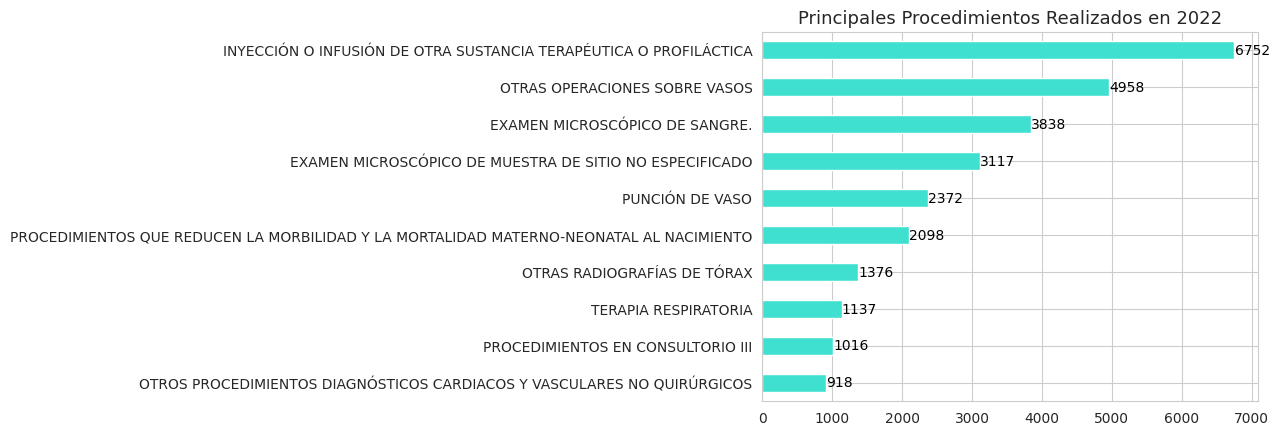

In [42]:
df = egresos[egresos['EGRESO'].dt.year==2022]
df_proc = procedimientos[procedimientos['ID'].isin(df['ID'])]
df = df_proc['PROMED'].value_counts().sort_values(ascending = False)[:10]
# Ordenar el DataFrame en orden ascendente
df = df.sort_values(ascending=True)

# Graficar la gráfica de barras horizontal
df.plot(kind='barh', color='turquoise')

plt.title("Principales Procedimientos Realizados en 2022")

# Mostrar los valores en la parte superior de la gráfica
for i, v in enumerate(df.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

#### Motivo de egreso por TOP 10 afecciones

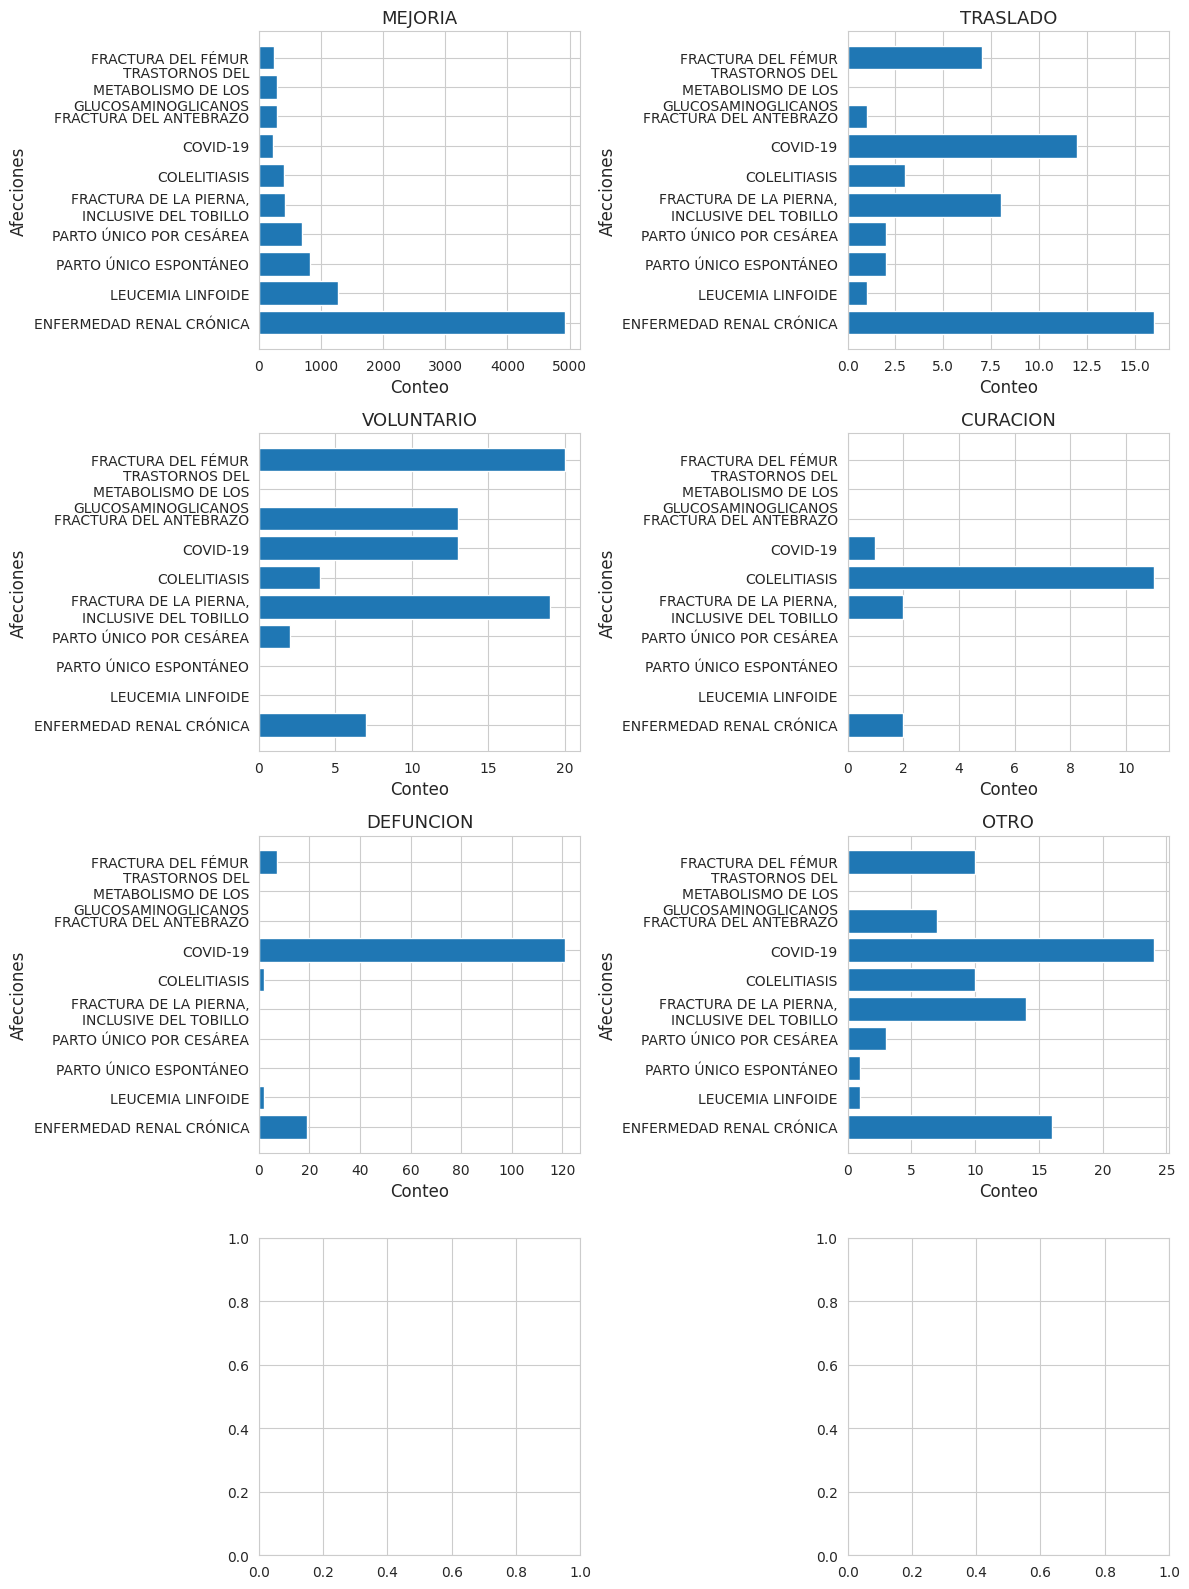

In [53]:
# Obtener el top 10 de afecciones principales en general
df = egresos[egresos['EGRESO'].dt.year ==2022]
top10_general = df['AFECPRIN'].value_counts().sort_values(ascending=False)[:10]

# Crear la figura y los subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Iterar sobre las categorías de MOTEGRE y crear los gráficos
for i, categoria in enumerate(df['MOTEGRE'].unique()[:8]):
    # Filtrar el DataFrame para incluir solo la categoría actual
    df_categoria = df[df['MOTEGRE'] == categoria]

    # Filtrar el DataFrame de la categoría para incluir solo las afecciones del top 10 general
    df_top10_categoria = df_categoria[df_categoria['AFECPRIN'].isin(top10_general.index)]

    # Obtener los conteos de las afecciones principales en la categoría
    conteos = df_top10_categoria['AFECPRIN'].value_counts().reindex(top10_general.index, fill_value=0)

    # Dividir el texto de las afecciones en líneas de 20 caracteres
    afecciones_wrapped = [textwrap.fill(afeccion, width=25) for afeccion in conteos.index]

    # Crear el gráfico de barras horizontal correspondiente
    ax = axs[i // 2, i % 2]
    ax.barh(afecciones_wrapped, conteos.values)
    ax.set_title(categoria)
    ax.set_xlabel('Conteo')
    ax.set_ylabel('Afecciones')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Principales afecciones por hospital

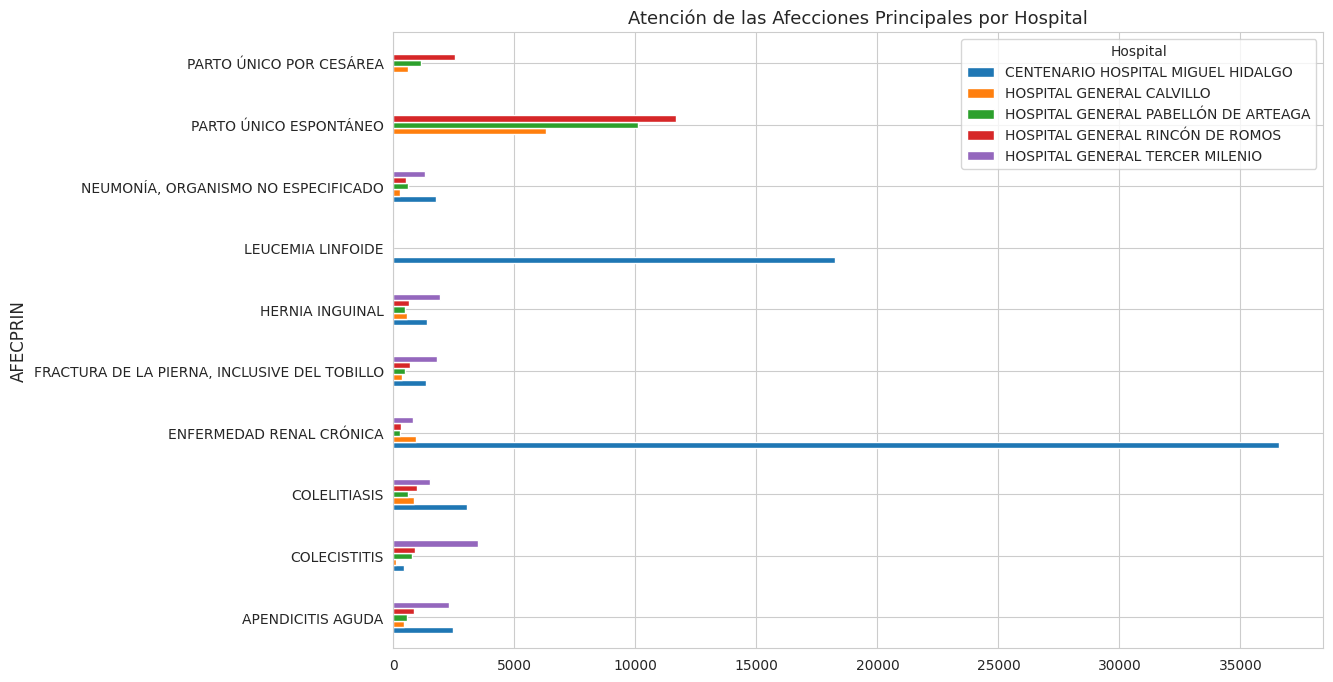

In [ ]:
top10 = egresos['AFECPRIN'].value_counts().sort_values(ascending=False)[:10]
fig = plt.figure(figsize=(12,8))
egresos_afec = egresos[egresos['AFECPRIN'].isin(list(top10.index))]
df = pd.crosstab(index=egresos_afec['AFECPRIN'],
           columns=egresos_afec['CLUES'], margins=False)
#Gráfica
df.plot(kind='barh', ax=fig.gca())
plt.title('Atención de las Afecciones Principales por Hospital')
#plt.xticks(rotation=45)
plt.legend(title = 'Hospital')
plt.show()

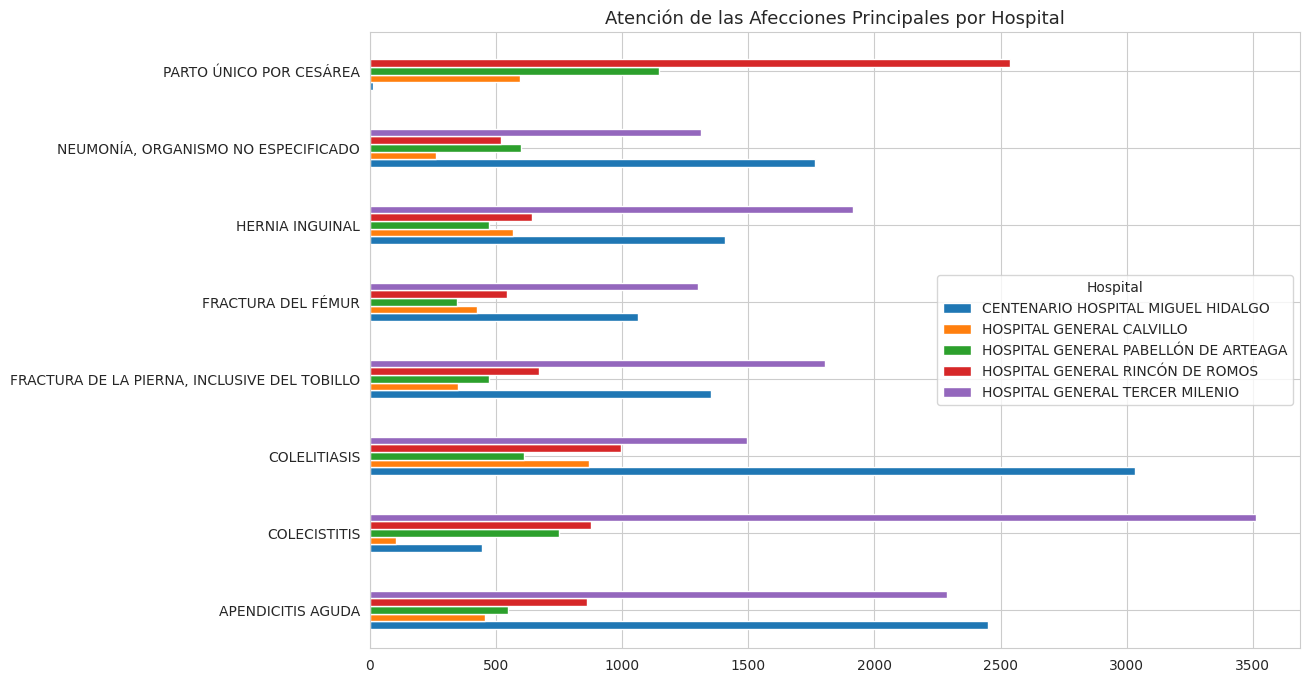

In [ ]:
# Sin leucemia ni enfermedad renal crónica ni parto
top10 = egresos[~(egresos['AFECPRIN'].isin(['ENFERMEDAD RENAL CRÓNICA', 'LEUCEMIA LINFOIDE', 'PARTO ÚNICO ESPONTÁNEO']))]
top10 = top10['AFECPRIN'].value_counts().sort_values(ascending=False)[:8]
fig = plt.figure(figsize=(12,8))
egresos_afec = egresos[egresos['AFECPRIN'].isin(list(top10.index))]
df = pd.crosstab(index=egresos_afec['AFECPRIN'],
           columns=egresos_afec['CLUES'], margins=False)
#Gráfica
df.plot(kind='barh', ax=fig.gca())
plt.title('Atención de las Afecciones Principales por Hospital')
plt.ylabel('')
plt.legend(title = 'Hospital')
plt.show()

#### Afecciones con más casos de infección intrahospitalaria

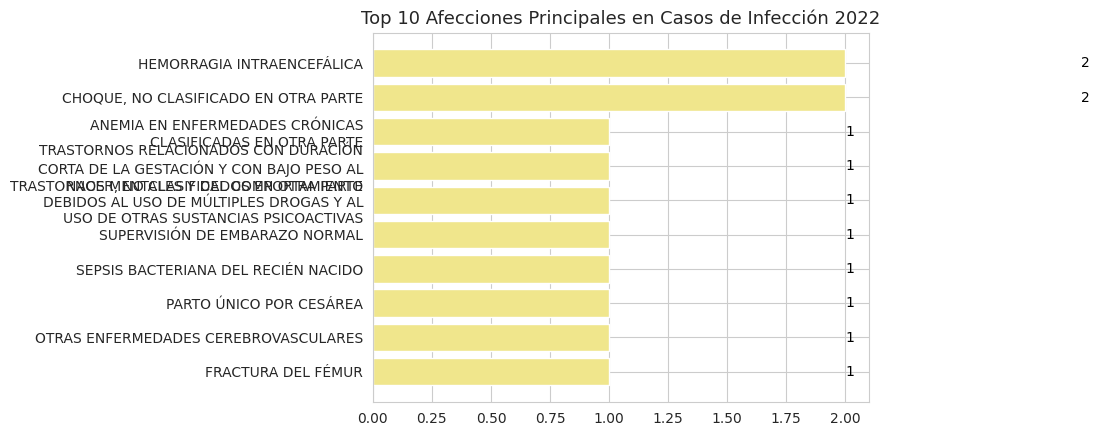

In [33]:
df = egresos[egresos['INFEC'] == 'SI']
df = df[df['EGRESO'].dt.year==2022]
df = df.groupby(['AFECPRIN'])['INFEC'].count().sort_values(ascending=False)[:10]

# Dividir el texto de la afección en líneas de 25 caracteres
afecciones_wrapped = [textwrap.fill(afeccion, width=40) for afeccion in df.index]

# Invertir el orden de los datos y el texto
df = df.iloc[::-1]
afecciones_wrapped = afecciones_wrapped[::-1]

# Crear el gráfico de barras horizontales con el texto ajustado
plt.barh(afecciones_wrapped, df.values, color='khaki')

plt.title('Top 10 Afecciones Principales en Casos de Infección 2022')

# Mostrar los valores en la parte superior de la gráfica
for i, v in enumerate(df.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()


#### Presencia de diabetes, hipertensión y obesidad en afecciones principales

Text(0, 0.5, '')

<Figure size 1000x600 with 0 Axes>

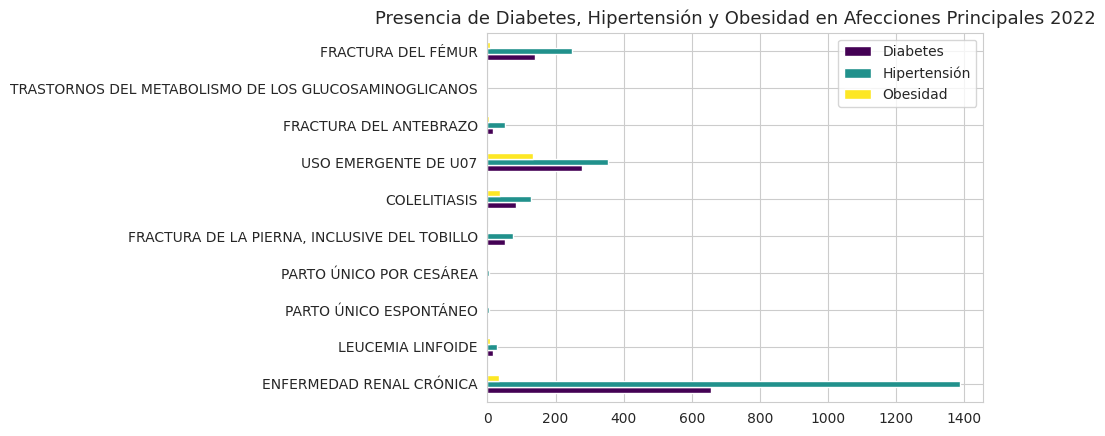

In [ ]:
df = egresos[egresos['EGRESO'].dt.year==2022]
top_afecprin = df['AFECPRIN'].value_counts().head(10)
visual_obj = pd.DataFrame(index=top_afecprin.index)

visual_obj['Diabetes'] = egresos.loc[egresos['AFECPRIN'].isin(top_afecprin.index) & (egresos['DIABETES'] == 'SI'), 'AFECPRIN'].value_counts().sort_index()
visual_obj['Hipertensión'] = egresos.loc[egresos['AFECPRIN'].isin(top_afecprin.index) & (egresos['HIPERTENSION'] == 'SI'), 'AFECPRIN'].value_counts().sort_index()
visual_obj['Obesidad'] = egresos.loc[egresos['AFECPRIN'].isin(top_afecprin.index) & (egresos['OBESIDAD'] == 'SI'), 'AFECPRIN'].value_counts().sort_index()

visual_obj.reset_index(inplace=True)
visual_obj.columns = ['AFECPRIN', 'Diabetes', 'Hipertensión', 'Obesidad']

fig = plt.figure(figsize=(10,6))
visual_obj.set_index('AFECPRIN', inplace = True)
visual_obj.plot(kind = 'barh', cmap = 'viridis')

plt.title('Presencia de Diabetes, Hipertensión y Obesidad en Afecciones Principales 2022')
plt.ylabel('')

Text(0, 0.5, '')

<Figure size 1000x600 with 0 Axes>

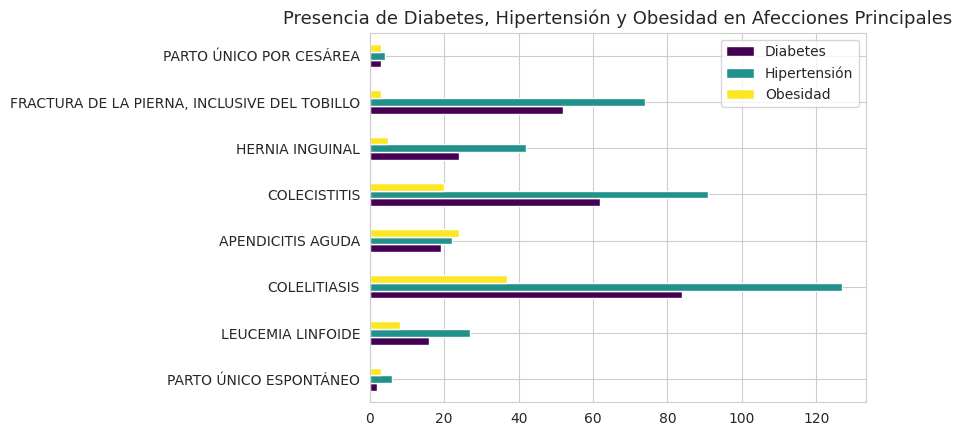

In [ ]:
# Sin ERC ni neumonía
top_afecprin = egresos[~(egresos['AFECPRIN'].isin(['ENFERMEDAD RENAL CRÓNICA', 'NEUMONÍA, ORGANISMO NO ESPECIFICADO']))]
top_afecprin = top_afecprin['AFECPRIN'].value_counts().head(8)
visual_obj = pd.DataFrame(index=top_afecprin.index)

visual_obj['Diabetes'] = egresos.loc[egresos['AFECPRIN'].isin(top_afecprin.index) & (egresos['DIABETES'] == 'SI'), 'AFECPRIN'].value_counts().sort_index()
visual_obj['Hipertensión'] = egresos.loc[egresos['AFECPRIN'].isin(top_afecprin.index) & (egresos['HIPERTENSION'] == 'SI'), 'AFECPRIN'].value_counts().sort_index()
visual_obj['Obesidad'] = egresos.loc[egresos['AFECPRIN'].isin(top_afecprin.index) & (egresos['OBESIDAD'] == 'SI'), 'AFECPRIN'].value_counts().sort_index()

visual_obj.reset_index(inplace=True)
visual_obj.columns = ['AFECPRIN', 'Diabetes', 'Hipertensión', 'Obesidad']

fig = plt.figure(figsize=(10,6))
visual_obj.set_index('AFECPRIN', inplace = True)
visual_obj.plot(kind = 'barh', cmap = 'viridis')

plt.title('Presencia de Diabetes, Hipertensión y Obesidad en Afecciones Principales')
plt.ylabel('')

####Promedio de estancia en pacientes con diabetes, hipertensión, obesidad

In [ ]:
df_si = egresos[(egresos['DIABETES']=='SI') | (egresos['HIPERTENSION']=='SI') | (egresos['OBESIDAD']=='SI')]
df_no = egresos[~((egresos['DIABETES']=='SI') | (egresos['HIPERTENSION']=='SI') | (egresos['OBESIDAD']=='SI'))]
print(df_si['DIAS_ESTA'].mean())
print(df_no['DIAS_ESTA'].mean())

6.341032534152631
2.907892171924921


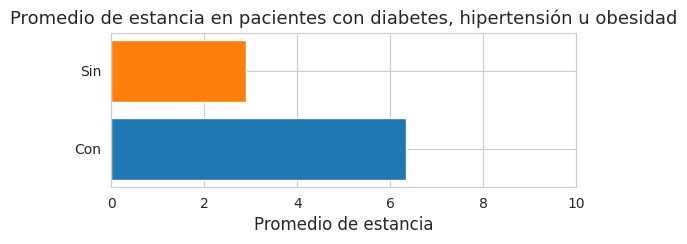

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 2))

plt.barh(['Con'], df_si['DIAS_ESTA'].mean(), label='Con')
plt.barh(['Sin'], df_no['DIAS_ESTA'].mean(), label='Sin')

# Configurar los ejes y etiquetas
plt.xlabel('Promedio de estancia')
#plt.ylabel('Presencia de Diabetes, Hipertensión u Obesidad')
plt.title('Promedio de estancia en pacientes con diabetes, hipertensión u obesidad')
plt.xlim(0, 10)

# Mostrar la gráfica
plt.show()

#### Top 5 Afecciones con distintos rangos de estancia

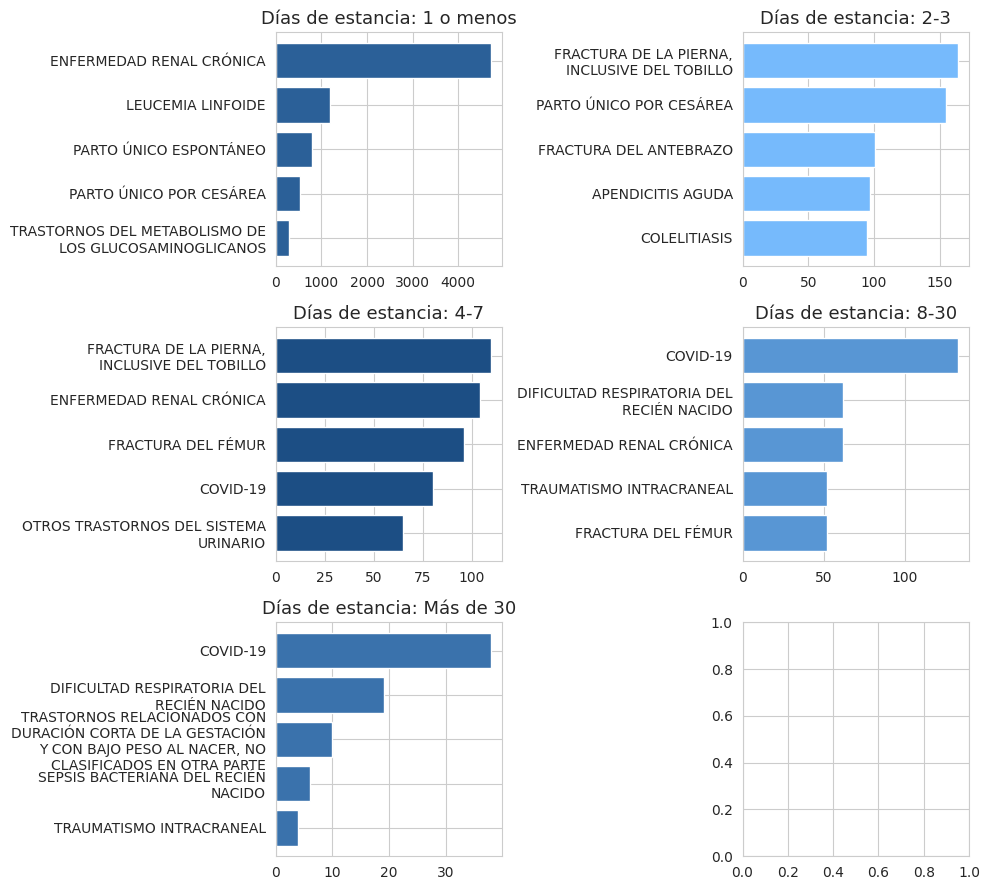

In [57]:
# Filtrar las categorías de estancia en orden
df = egresos[egresos['EGRESO'].dt.year==2022]
categorias = df['CAT_DIASESTA'].unique().tolist()
categorias.append('Más de 30')
categorias = sorted(categorias, key=lambda x: int(x.split()[0].split('-')[0]) if x.split()[0].split('-')[0].isdigit() else float('inf'))

# Crear la figura y los subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 9))

# Iterar sobre las categorías de estancia y crear los gráficos
for i, categoria in enumerate(categorias[:-1]):  # Ignorar la última categoría
    # Filtrar el DataFrame para incluir solo la categoría actual
    df_categoria = df[df['CAT_DIASESTA'] == categoria]

    # Filtrar el DataFrame de la categoría para incluir solo las afecciones del top 5
    df_top5 = df_categoria['AFECPRIN'].value_counts().nlargest(5)

    # Obtener los conteos de las afecciones principales en la categoría
    conteos = df_top5.sort_values(ascending=True)

    # Dividir el texto de las afecciones en líneas de 20 caracteres
    afecciones_wrapped = [textwrap.fill(afeccion, width=30) for afeccion in conteos.index]

    # Crear el gráfico de barras horizontal correspondiente
    ax = axs[i // 2, i % 2]
    ax.barh(afecciones_wrapped, conteos, color=random.choice(colores))
    ax.set_title(f'Días de estancia: {categoria}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ocultar el último subplot
#axs[2, 1].axis('off')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Top 5 Afecciones por categría de edad

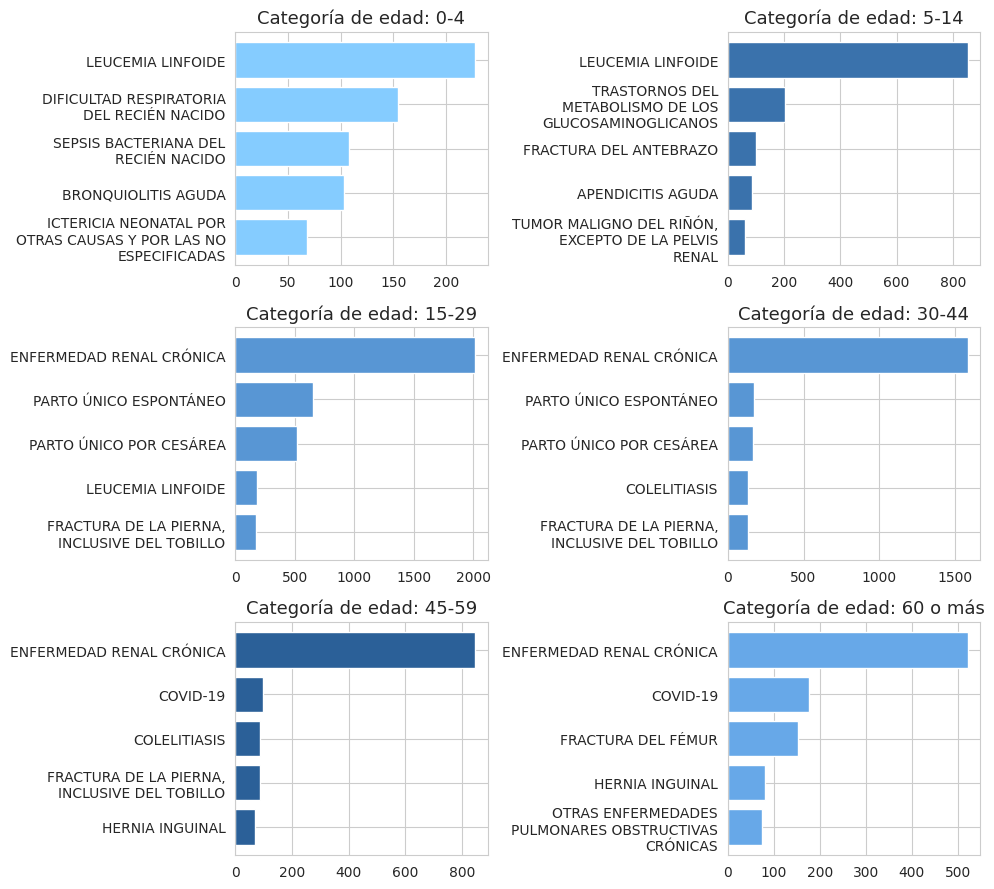

In [61]:
# Filtrar las categorías de estancia en orden
df = egresos[egresos['EGRESO'].dt.year==2022]
categorias = df['CAT_EDAD'].unique().tolist()
categorias.append('60 o más')
categorias = sorted(categorias, key=lambda x: int(x.split()[0].split('-')[0]) if x.split()[0].split('-')[0].isdigit() else float('inf'))

# Crear la figura y los subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 9))

# Iterar sobre las categorías de estancia y crear los gráficos
for i, categoria in enumerate(categorias[:-1]):  # Ignorar la última categoría
    # Filtrar el DataFrame para incluir solo la categoría actual
    df_categoria = df[df['CAT_EDAD'] == categoria]

    # Filtrar el DataFrame de la categoría para incluir solo las afecciones del top 5
    df_top5 = df_categoria['AFECPRIN'].value_counts().nlargest(5)

    # Obtener los conteos de las afecciones principales en la categoría
    conteos = df_top5.sort_values(ascending=True)

    # Dividir el texto de las afecciones en líneas de 20 caracteres
    afecciones_wrapped = [textwrap.fill(afeccion, width=25) for afeccion in conteos.index]

    # Crear el gráfico de barras horizontal correspondiente
    ax = axs[i // 2, i % 2]
    ax.barh(afecciones_wrapped, conteos,  color=random.choice(colores))
    ax.set_title(f'Categoría de edad: {categoria}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# create a list of our conditions
egresos2b = egresos2.drop(['CAT_DIASESTA'], axis = 1)
conditions = [
     (egresos2b['DIAS_ESTA'] == 0),
     (egresos2b['DIAS_ESTA'] == 1),
     (egresos2b['DIAS_ESTA'] >1) & (egresos2b['DIAS_ESTA'] <= 3),
     (egresos2b['DIAS_ESTA'] > 3) & (egresos2b['DIAS_ESTA'] <= 10),
     (egresos2b['DIAS_ESTA'] > 10)]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2 a 3', '4 a 10', '10 a 30']

# create a new column and use np.select to assign values to it using our lists as arguments
egresos2b['CAT_DIASESTA'] = np.select(conditions, values)

# display updated DataFrame
egresos2b.head()

ID                               CLUES      INGRE     EGRESO  DIAS_ESTA  \
0   1  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   
2   3  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-06 2010-01-06          1   
3   4  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-05 2010-01-05          1   
4   5  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   
7   8  CENTENARIO HOSPITAL MIGUEL HIDALGO 2010-01-04 2010-01-04          1   

   EDAD SEXO DERHAB           MUNIC TIPSERV  ... CAUSAEXT INFEC  MOTEGRE  \
0     0    M     NE  AGUASCALIENTES  NORMAL  ...      NaN    NO  MEJORIA   
2     6    H     NE        ASIENTOS  NORMAL  ...      NaN    NO  MEJORIA   
3     5    H     NE        EL LLANO  NORMAL  ...      NaN    NO  MEJORIA   
4    18    H     NE  AGUASCALIENTES  NORMAL  ...      NaN    NO  MEJORIA   
7    17    M     NE     JESUS MARIA  NORMAL  ...      NaN    NO  MEJORIA   

  NUMPROMED NUMAFEC CAT_EDAD DIABETES  HIPERTENSION  OBESIDAD CAT_DIASESTA  
0       1.0     0.0      0-4       NO            NO        NO            1  
2       1.0     0.0     5-14       NO            NO        NO            1  
3       1.0     0.0     5-14       NO            NO        NO            1  
4       1.0     0.0    15-29       NO            NO        NO            1  
7       1.0     0.0    15-29       NO            NO        NO            1  

[5 rows x 24 columns]

In [ ]:
# create a list of our conditions
egresos3b = egresos3.drop(['CAT_DIASESTA'], axis = 1)
conditions = [
     (egresos3b['DIAS_ESTA'] > 30) & (egresos3b['DIAS_ESTA'] <= 90),
     (egresos3b['DIAS_ESTA'] > 90) & (egresos3b['DIAS_ESTA'] <= 183),
     (egresos3b['DIAS_ESTA'] > 183) & (egresos3b['DIAS_ESTA'] <= 365),
     (egresos3b['DIAS_ESTA'] > 365) & (egresos3b['DIAS_ESTA'] <= 730),
     (egresos3b['DIAS_ESTA'] > 730)]

# create a list of the values we want to assign for each condition
values = ['1 a 3 meses', '3 a 6 meses', '6 meses a 1 año', '1 a 2 años', 'Más de 2 años']

# create a new column and use np.select to assign values to it using our lists as arguments
egresos3b['CAT_DIASESTA'] = np.select(conditions, values)

# display updated DataFrame
egresos3b.head()

ID                               CLUES      INGRE     EGRESO  DIAS_ESTA  \
378  379  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-14 2010-01-14         31   
396  397  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-06 2010-01-07         32   
498  499  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-11-04 2010-01-17         74   
591  592  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-11-11 2010-01-07         57   
765  766  CENTENARIO HOSPITAL MIGUEL HIDALGO 2009-12-17 2010-01-17         31   

     EDAD SEXO DERHAB               MUNIC TIPSERV  ...  \
378     0    H     NE      AGUASCALIENTES  NORMAL  ...   
396     2    M     NE         JESUS MARIA  NORMAL  ...   
498     0    M     NE  SAN JOSE DE GRACIA  NORMAL  ...   
591    27    H     NE      AGUASCALIENTES  NORMAL  ...   
765    47    M     NE      AGUASCALIENTES  NORMAL  ...   

                                   CAUSAEXT INFEC    MOTEGRE NUMPROMED  \
378                                     NaN    NO    MEJORIA       1.0   
396                                     NaN    SI    MEJORIA       2.0   
498                                     NaN    NO    MEJORIA       5.0   
591                                     NaN    NO    MEJORIA       3.0   
765  EXPOSICIÓN A FACTORES NO ESPECIFICADOS    NO  DEFUNCION       1.0   

    NUMAFEC CAT_EDAD DIABETES  HIPERTENSION  OBESIDAD CAT_DIASESTA  
378     4.0      0-4       NO            NO        NO  1 a 3 meses  
396     2.0      0-4       NO            NO        NO  1 a 3 meses  
498     3.0      0-4       NO            NO        NO  1 a 3 meses  
591     1.0    15-29       NO            NO        NO  1 a 3 meses  
765     3.0    45-59       NO            NO        NO  1 a 3 meses  

[5 rows x 24 columns]

## Exploración por sexo

#### Motivo de egreso por sexo (porcentajes)

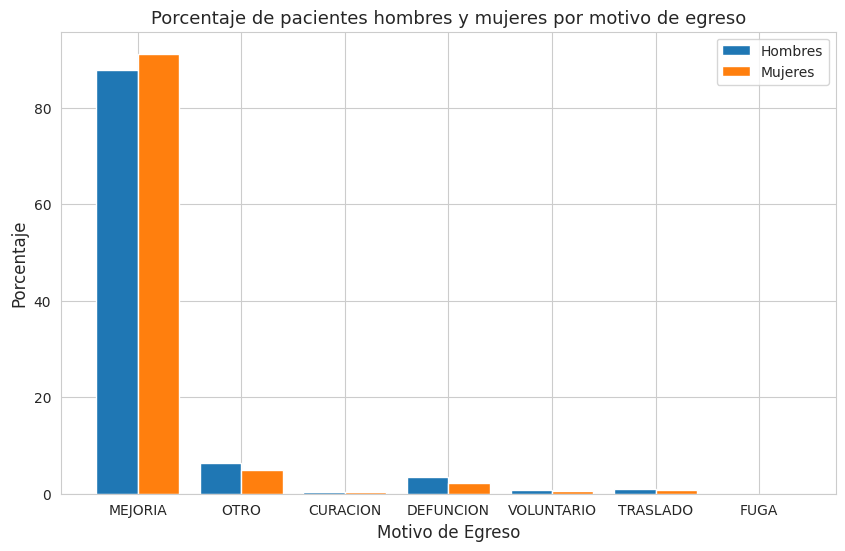

In [ ]:
# Filtrar los datos solo para hombres y mujeres
df_hombres = egresos[egresos['SEXO'] == 'H']
total_hombres = len(df_hombres)
df_mujeres = egresos[egresos['SEXO'] == 'M']
total_mujeres = len(df_mujeres)

# Calcular los porcentajes de hombres y mujeres por motivo de egreso
motivos_egreso = egresos2['MOTEGRE'].unique()
porcentaje_hombres = []
porcentaje_mujeres = []

for motivo in motivos_egreso:
    hombres = len(df_hombres[df_hombres['MOTEGRE'] == motivo])
    mujeres = len(df_mujeres[df_mujeres['MOTEGRE'] == motivo])

    porcentaje_hombres.append((hombres / total_hombres) * 100)
    porcentaje_mujeres.append((mujeres / total_mujeres) * 100)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
x = range(len(motivos_egreso))
width = 0.4

plt.bar(x, porcentaje_hombres, width=width, label='Hombres')
plt.bar([i + width for i in x], porcentaje_mujeres, width=width, label='Mujeres')

# Configurar los ejes y etiquetas
plt.xlabel('Motivo de Egreso')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de pacientes hombres y mujeres por motivo de egreso')
plt.xticks([i + width / 2 for i in x], motivos_egreso)
plt.legend()

# Mostrar la gráfica
plt.show()


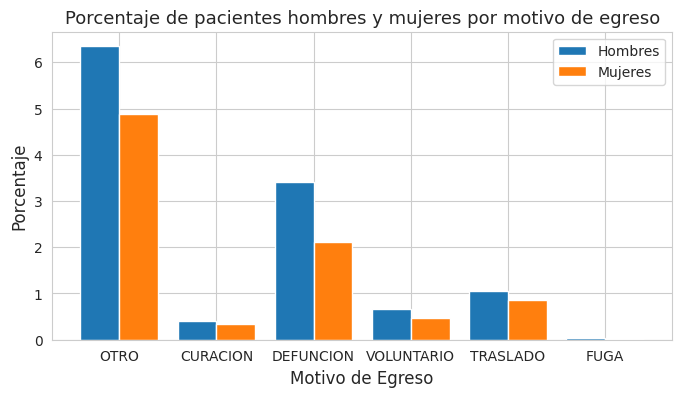

In [ ]:
###---QUITANDO MEJORÍA---###
# Filtrar los datos solo para hombres y mujeres
df_hombres = egresos[egresos['SEXO'] == 'H']
total_hombres = len(df_hombres)
df_mujeres = egresos[egresos['SEXO'] == 'M']
total_mujeres = len(df_mujeres)

# Calcular los porcentajes de hombres y mujeres por motivo de egreso
motivos_egreso = egresos2[~(egresos2['MOTEGRE']=='MEJORIA')]
motivos_egreso = motivos_egreso['MOTEGRE'].unique()
porcentaje_hombres = []
porcentaje_mujeres = []

for motivo in motivos_egreso:
    hombres = len(df_hombres[df_hombres['MOTEGRE'] == motivo])
    mujeres = len(df_mujeres[df_mujeres['MOTEGRE'] == motivo])

    porcentaje_hombres.append((hombres / total_hombres) * 100)
    porcentaje_mujeres.append((mujeres / total_mujeres) * 100)

# Crear la gráfica de barras
plt.figure(figsize=(8, 4))
x = range(len(motivos_egreso))
width = 0.4

plt.bar(x, porcentaje_hombres, width=width, label='Hombres')
plt.bar([i + width for i in x], porcentaje_mujeres, width=width, label='Mujeres')

# Configurar los ejes y etiquetas
plt.xlabel('Motivo de Egreso')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de pacientes hombres y mujeres por motivo de egreso')
plt.xticks([i + width / 2 for i in x], motivos_egreso)
plt.legend()

# Mostrar la gráfica
plt.show()


####Porcentaje de hombres y mujeres por categoría de edad

#### Porcentaje de hombres y mujeres por estancia

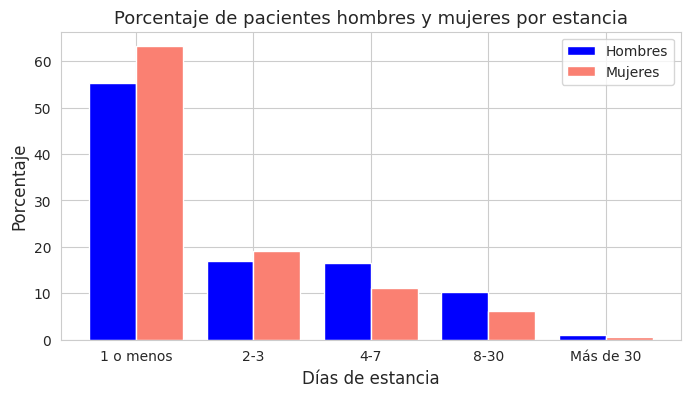

In [ ]:
# Calcular los porcentajes de hombres y mujeres por categoría de estancia
categorias_estancia = sorted(egresos['CAT_DIASESTA'].unique())
porcentaje_hombres = []
porcentaje_mujeres = []
df_hombres = egresos[egresos['SEXO'] == 'H']
total_hombres = len(df_hombres)
df_mujeres = egresos[egresos['SEXO'] == 'M']
total_mujeres = len(df_mujeres)

for categoria in categorias_estancia:
    hombres = len(df_hombres[(df_hombres['CAT_DIASESTA'] == categoria)])
    mujeres = len(df_mujeres[(df_mujeres['CAT_DIASESTA'] == categoria)])

    porcentaje_hombres.append((hombres / total_hombres) * 100)
    porcentaje_mujeres.append((mujeres / total_mujeres) * 100)

# Crear la gráfica de barras
plt.figure(figsize=(8, 4))
x = range(len(categorias_estancia))
width = 0.4

plt.bar(x, porcentaje_hombres, width=width, label='Hombres', color = '#0000FF')
plt.bar([i + width for i in x], porcentaje_mujeres, width=width, label='Mujeres', color = '#FA8072')

# Configurar los ejes y etiquetas
plt.xlabel('Días de estancia')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de pacientes hombres y mujeres por estancia')
plt.xticks([i + width / 2 for i in x], categorias_estancia)
plt.legend()

# Mostrar la gráfica
plt.show()



In [ ]:
egresos3[egresos3['CAT_DIASESTA']=='Más de 30']['SEXO'].value_counts()

H    1296
M     970
Name: SEXO, dtype: int64

#### TOP 10 afecciones por sexo

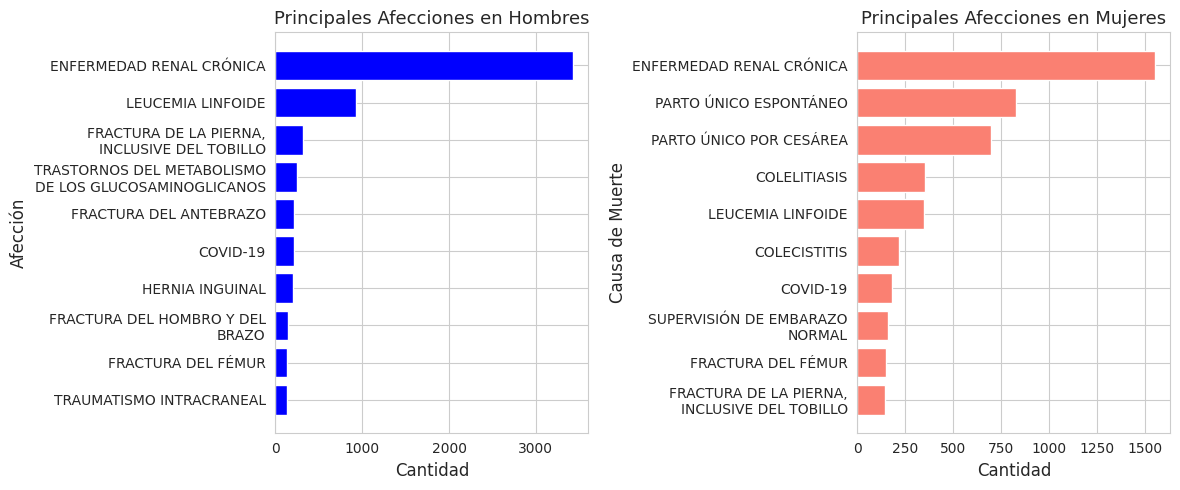

In [38]:
#color = '#0000FF' steelblue
#color = '#FA8072' salmon

df = egresos.copy()
df = df[df['EGRESO'].dt.year==2022]
# Filtrar los registros de hombres con motivo de egreso igual a 'Defunción'
hombres = df[(df['SEXO'] == 'H')]

# Filtrar los registros de mujeres con motivo de egreso igual a 'Defunción'
mujeres = df[(df['SEXO'] == 'M')]

# Obtener el top 10 de las principales afecciones en hombres
top_10_causas_hombres = hombres['AFECPRIN'].value_counts().nlargest(10)

# Obtener el top 10 de las principales afecciones en mujeres
top_10_causas_mujeres = mujeres['AFECPRIN'].value_counts().nlargest(10)

# Obtener las causas y sus respectivos conteos en hombres
causas_hombres = top_10_causas_hombres.index.tolist()
conteos_hombres = top_10_causas_hombres.values.tolist()

# Obtener las causas y sus respectivos conteos en mujeres
causas_mujeres = top_10_causas_mujeres.index.tolist()
conteos_mujeres = top_10_causas_mujeres.values.tolist()

# Envolver el texto de las afecciones en varias líneas
causas_hombres_wrapped = [textwrap.fill(causa, width=27) for causa in causas_hombres]
causas_mujeres_wrapped = [textwrap.fill(causa, width=27) for causa in causas_mujeres]

# Invertir el orden de los datos para colocar el valor más grande en la parte superior
causas_hombres_wrapped.reverse()
conteos_hombres.reverse()
causas_mujeres_wrapped.reverse()
conteos_mujeres.reverse()

# Crear la figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica para hombres
axes[0].barh(range(len(causas_hombres_wrapped)), conteos_hombres, align='center', color='#0000FF')
axes[0].set_yticks(range(len(causas_hombres_wrapped)))
axes[0].set_yticklabels(causas_hombres_wrapped)
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Afección')
axes[0].set_title('Principales Afecciones en Hombres')

# Gráfica para mujeres
axes[1].barh(range(len(causas_mujeres_wrapped)), conteos_mujeres, align='center', color='#FA8072')
axes[1].set_yticks(range(len(causas_mujeres_wrapped)))
axes[1].set_yticklabels(causas_mujeres_wrapped)
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Causa de Muerte')
axes[1].set_title('Principales Afecciones en Mujeres')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


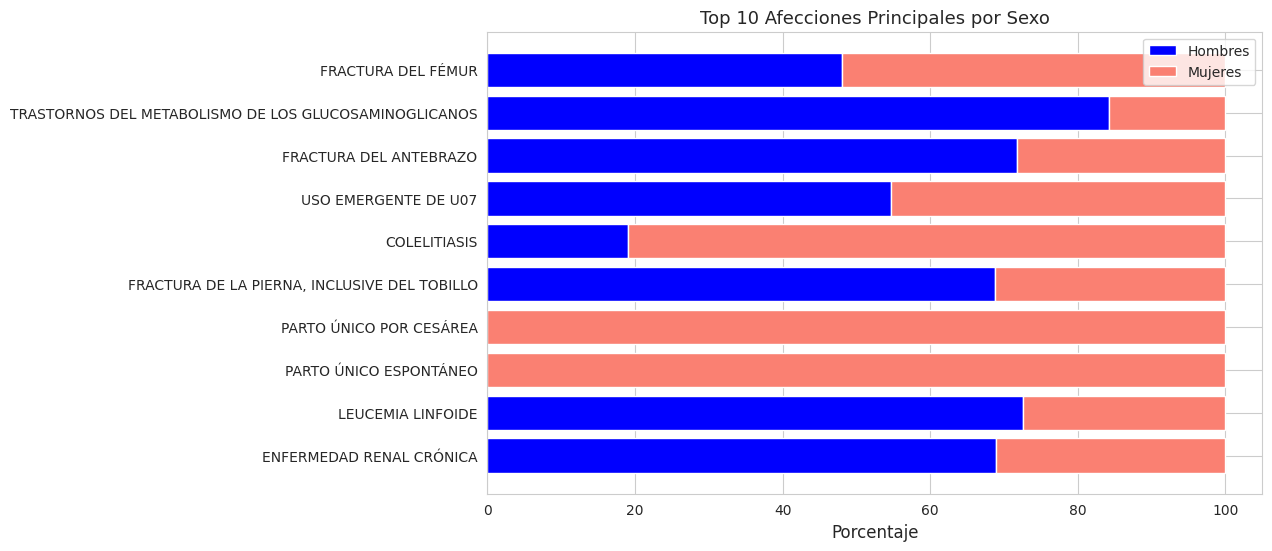

In [ ]:
df=egresos.copy()
df = df[df['EGRESO'].dt.year==2022]
# Obtener el top 10 de afecciones principales
top_10_afecciones = df['AFECPRIN'].value_counts().nlargest(10).index

# Calcular los porcentajes de hombres y mujeres por cada afección principal del top 10
porcentaje_hombres = []
porcentaje_mujeres = []

for afeccion in top_10_afecciones:
    hombres = len(df[(df['AFECPRIN'] == afeccion) & (df['SEXO'] == 'H')])
    mujeres = len(df[(df['AFECPRIN'] == afeccion) & (df['SEXO'] == 'M')])
    total_pacientes = hombres + mujeres

    porcentaje_hombres.append((hombres / total_pacientes) * 100)
    porcentaje_mujeres.append((mujeres / total_pacientes) * 100)

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))

plt.barh(top_10_afecciones, porcentaje_hombres, label='Hombres', color = '#0000FF')
plt.barh(top_10_afecciones, porcentaje_mujeres, left=porcentaje_hombres, label='Mujeres', color = '#FA8072')

# Configurar los ejes y etiquetas
plt.xlabel('Porcentaje')
plt.ylabel('')
plt.title('Top 10 Afecciones Principales por Sexo')
plt.legend()

# Mostrar la gráfica
plt.show()


#### Porcentaje de hombres y mujeres con diagnóstico inicial erróneo

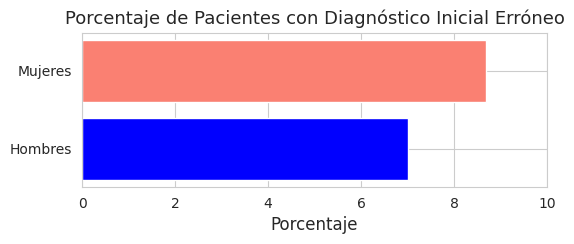

In [ ]:
df = egresos.copy()
# Contar el número de hombres y mujeres con diagnóstico inicial erróneo
hombres_diagnostico_erroneo = len(df[(df['DIAG_INI'] != df['AFECPRIN']) & (df['SEXO'] == 'H')])
mujeres_diagnostico_erroneo = len(df[(df['DIAG_INI'] != df['AFECPRIN']) & (df['SEXO'] == 'M')])

# Calcular los porcentajes de hombres y mujeres con diagnóstico inicial erróneo
total_hombres = len(df[df['SEXO'] == 'H'])
total_mujeres = len(df[df['SEXO'] == 'M'])

porcentaje_hombres = (hombres_diagnostico_erroneo / total_hombres) * 100
porcentaje_mujeres = (mujeres_diagnostico_erroneo / total_mujeres) * 100

# Crear la gráfica de barras
plt.figure(figsize=(6, 2))

plt.barh(['Hombres'], [porcentaje_hombres], label='Hombres', color = '#0000FF')
plt.barh(['Mujeres'], [porcentaje_mujeres], label='Mujeres', color = '#FA8072')

# Configurar los ejes y etiquetas
plt.xlabel('Porcentaje')
plt.ylabel('')
plt.title('Porcentaje de Pacientes con Diagnóstico Inicial Erróneo')
plt.xlim(0, 10)

# Mostrar la gráfica
plt.show()


#### Principales causas de mortalidad en hombres y mujeres

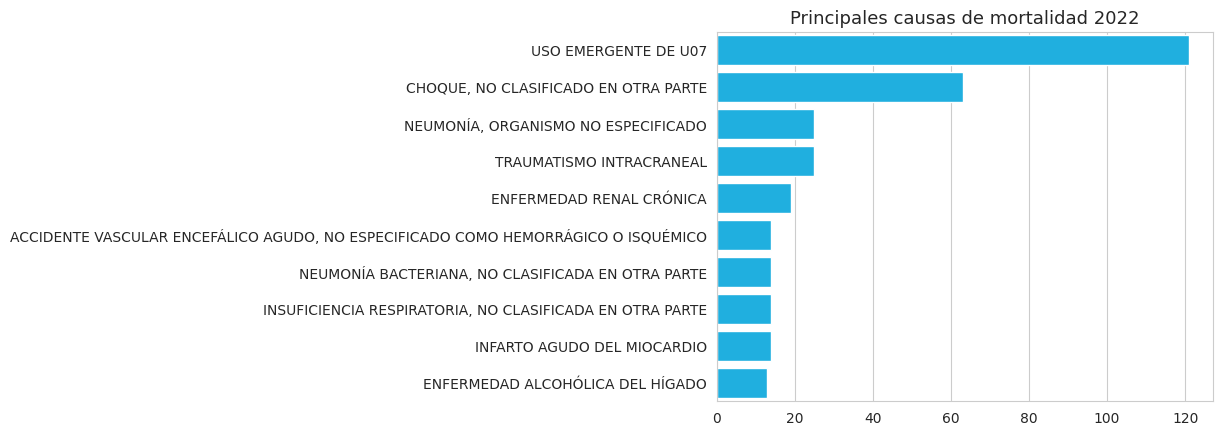

In [ ]:
#FILTRAR LAS 10 CAUSAS DE MORTALIDAD
top10 = egresos[(egresos['MOTEGRE']=='DEFUNCION') & (egresos['EGRESO'].dt.year == 2022)]
top10 = top10['AFECPRIN'].value_counts().sort_values(ascending = False)[:10]

#Graficar
sns.barplot(
    x=top10.values,
    y=top10.index,
    color='deepskyblue')

plt.title("Principales causas de mortalidad 2022")
plt.show()

In [ ]:
egresos[egresos['MOTEGRE']=='DEFUNCION']['SEXO'].value_counts()

H    4575
M    3956
Name: SEXO, dtype: int64

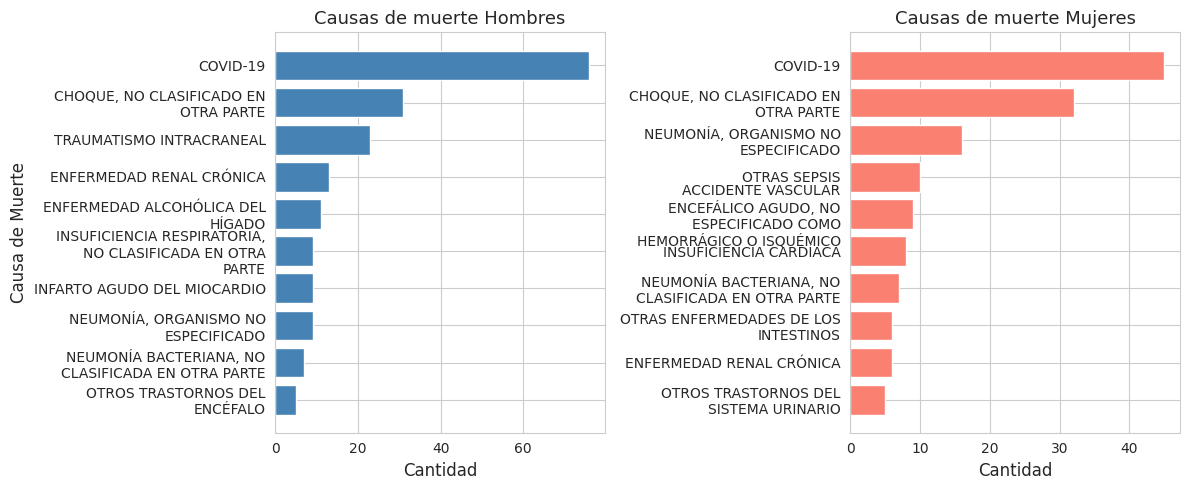

In [64]:
df = egresos.copy()
df = df[df['EGRESO'].dt.year==2022]
# Filtrar los registros de hombres con motivo de egreso igual a 'Defunción'
hombres_defuncion = df[(df['SEXO'] == 'H') & (df['MOTEGRE'] == 'DEFUNCION')]

# Filtrar los registros de mujeres con motivo de egreso igual a 'Defunción'
mujeres_defuncion = df[(df['SEXO'] == 'M') & (df['MOTEGRE'] == 'DEFUNCION')]

# Obtener el top 10 de las principales causas de muerte en hombres
top_10_causas_hombres = hombres_defuncion['AFECPRIN'].value_counts().nlargest(10)

# Obtener el top 10 de las principales causas de muerte en mujeres
top_10_causas_mujeres = mujeres_defuncion['AFECPRIN'].value_counts().nlargest(10)

# Obtener las causas y sus respectivos conteos en hombres
causas_hombres = top_10_causas_hombres.index.tolist()
conteos_hombres = top_10_causas_hombres.values.tolist()

# Obtener las causas y sus respectivos conteos en mujeres
causas_mujeres = top_10_causas_mujeres.index.tolist()
conteos_mujeres = top_10_causas_mujeres.values.tolist()

# Envolver el texto de las afecciones en varias líneas
causas_hombres_wrapped = [textwrap.fill(causa, width=27) for causa in causas_hombres]
causas_mujeres_wrapped = [textwrap.fill(causa, width=27) for causa in causas_mujeres]

# Invertir el orden de los datos para colocar el valor más grande en la parte superior
causas_hombres_wrapped.reverse()
conteos_hombres.reverse()
causas_mujeres_wrapped.reverse()
conteos_mujeres.reverse()

# Crear la figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica para hombres
axes[0].barh(range(len(causas_hombres_wrapped)), conteos_hombres, align='center', color='steelblue')
axes[0].set_yticks(range(len(causas_hombres_wrapped)))
axes[0].set_yticklabels(causas_hombres_wrapped)
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Causa de Muerte')
axes[0].set_title('Causas de muerte Hombres')

# Gráfica para mujeres
axes[1].barh(range(len(causas_mujeres_wrapped)), conteos_mujeres, align='center', color='salmon')
axes[1].set_yticks(range(len(causas_mujeres_wrapped)))
axes[1].set_yticklabels(causas_mujeres_wrapped)
axes[1].set_xlabel('Cantidad')
#axes[1].set_ylabel('Causa de Muerte')
axes[1].set_title('Causas de muerte Mujeres')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Porcentaje de hombres y mujeres que contrajeron infección intrahospitalaria

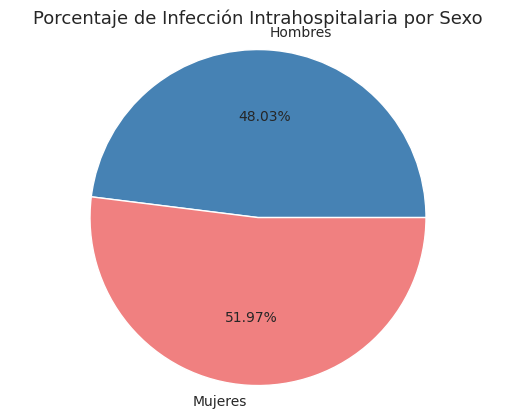

In [ ]:
df = egresos.copy()
# Filtrar los registros para los que INFEC es igual a 'SI'
infecciones = df[df['INFEC'] == 'SI']

# Contar el número de hombres y mujeres con infección intrahospitalaria
conteo_hombres = infecciones[infecciones['SEXO'] == 'H']['SEXO'].count()
conteo_mujeres = infecciones[infecciones['SEXO'] == 'M']['SEXO'].count()

# Calcular el porcentaje de hombres y mujeres con infección intrahospitalaria
porcentaje_hombres = (conteo_hombres / len(infecciones)) * 100
porcentaje_mujeres = (conteo_mujeres / len(infecciones)) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear una lista de etiquetas de categoría
categorias = ['Hombres', 'Mujeres']

# Crear una lista de porcentajes
porcentajes = [porcentaje_hombres, porcentaje_mujeres]

# Graficar el porcentaje de hombres y mujeres como un gráfico de pastel
ax.pie(porcentajes, labels=categorias, colors=['steelblue', 'lightcoral'], autopct='%1.2f%%')

# Configurar el aspecto del gráfico de pastel
ax.axis('equal')
ax.set_title('Porcentaje de Infección Intrahospitalaria por Sexo')

# Mostrar la gráfica
plt.show()


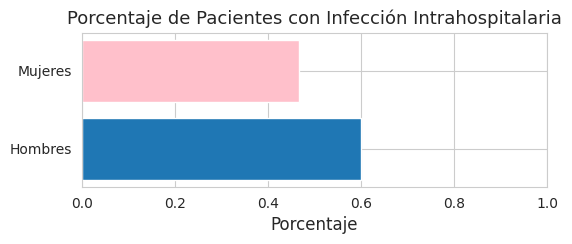

In [ ]:
df = egresos.copy()
# Contar el número de hombres y mujeres con infeccion
hombres_infec = len(df[(df['INFEC'] == 'SI') & (df['SEXO'] == 'H')])
mujeres_infec = len(df[(df['INFEC'] == 'SI') & (df['SEXO'] == 'M')])

# Calcular los porcentajes de hombres y mujeres con infeccion
total_hombres = len(df[df['SEXO'] == 'H'])
total_mujeres = len(df[df['SEXO'] == 'M'])

porcentaje_hombres = (hombres_infec / total_hombres) * 100
porcentaje_mujeres = (mujeres_infec / total_mujeres) * 100

# Crear la gráfica de barras
plt.figure(figsize=(6, 2))

plt.barh(['Hombres'], [porcentaje_hombres], label='Hombres')
plt.barh(['Mujeres'], [porcentaje_mujeres], label='Mujeres', color = 'pink')

# Configurar los ejes y etiquetas
plt.xlabel('Porcentaje')
plt.ylabel('')
plt.title('Porcentaje de Pacientes con Infección Intrahospitalaria')
plt.xlim(0, 1)

# Mostrar la gráfica
plt.show()

## NUEVOS

### Defunciones por año

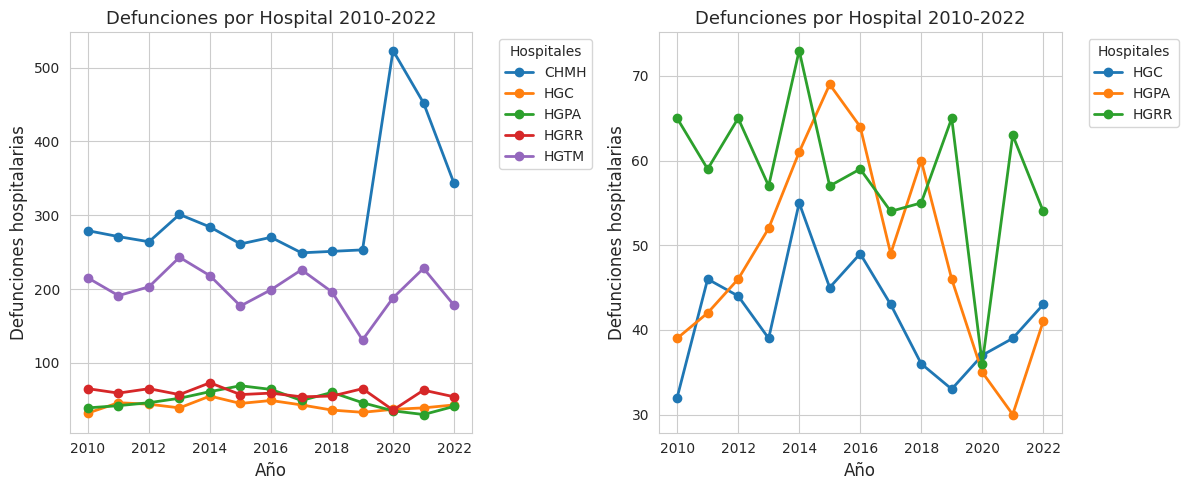

In [ ]:
df = egresos[egresos['MOTEGRE']=='DEFUNCION']
df = pd.crosstab(index=df['EGRESO'].dt.year, columns=df['CLUES'], margins=False)

df2 = egresos[egresos['MOTEGRE']=='DEFUNCION']
df2 = df2[~((df2['CLUES'] == 'CENTENARIO HOSPITAL MIGUEL HIDALGO') | (df2['CLUES'] == 'HOSPITAL GENERAL TERCER MILENIO'))]
df2 = pd.crosstab(index=df2['EGRESO'].dt.year, columns=df2['CLUES'], margins=False)

# Configurar la figura y los ejes de subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el primer DataFrame
df.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Defunciones hospitalarias')
axes[0].set_title('Defunciones por Hospital 2010-2022')

# Mover la leyenda fuera de la gráfica y cambiar los nombres de las leyendas
axes[0].legend(labels=['CHMH', 'HGC', 'HGPA', 'HGRR', 'HGTM'], title='Hospitales', bbox_to_anchor=(1.05, 1), loc='upper left')

# Graficar el segundo DataFrame
df2.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Defunciones hospitalarias')
axes[1].set_title('Defunciones por Hospital 2010-2022')

# Mover la leyenda fuera de la gráfica y cambiar los nombres de las leyendas
axes[1].legend(labels=['HGC', 'HGPA', 'HGRR'], title='Hospitales', bbox_to_anchor=(1.05, 1), loc='upper left')

#Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

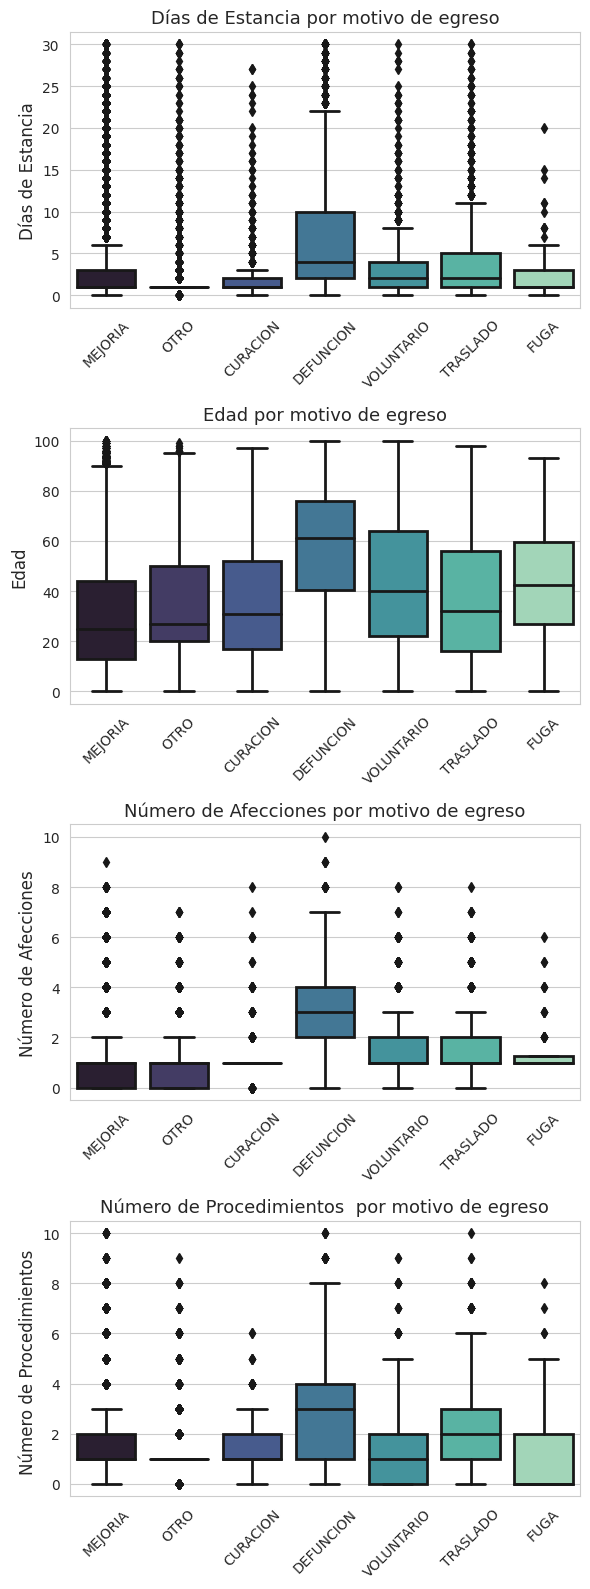

In [68]:
variables = ['DIAS_ESTA', 'EDAD', 'NUMAFEC', 'NUMPROMED']
df = egresos2[(egresos2['EDAD']<=100) & (egresos2['NUMAFEC']<=10) & (egresos2['NUMPROMED']<=10)]
# Diccionario de nombres de etiquetas personalizados
etiquetas = {
    'DIAS_ESTA': 'Días de Estancia',
    'EDAD': 'Edad',
    'NUMAFEC': 'Número de Afecciones',
    'NUMPROMED': 'Número de Procedimientos '
}

# Configurar la figura y los ejes
fig, axes = plt.subplots(len(variables), 1, figsize=(6, 4 * len(variables)))

# Recorrer las variables
for i, variable in enumerate(variables):
    ax = axes[i]

    # Crear el boxplot
    sns.boxplot(x='MOTEGRE', y=variable, data=df, ax=ax, palette = 'mako')

    # Establecer el título y los nombres de los ejes
    ax.set_title(f'{etiquetas.get(variable, variable)} por motivo de egreso')
    ax.set_xlabel('')
    ax.set_ylabel(etiquetas.get(variable, variable))

    # Customize tick labels
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both')


# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

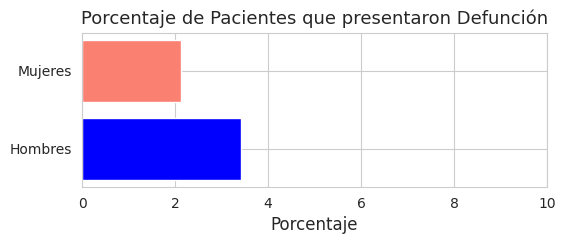

In [65]:
df = egresos.copy()
# Contar el número de hombres y mujeres con diagnóstico inicial erróneo
hombres_defuncion = len(df[(df['MOTEGRE'] =='DEFUNCION') & (df['SEXO'] == 'H')])
mujeres_defuncion = len(df[(df['MOTEGRE'] =='DEFUNCION') & (df['SEXO'] == 'M')])

# Calcular los porcentajes de hombres y mujeres con diagnóstico inicial erróneo
total_hombres = len(df[df['SEXO'] == 'H'])
total_mujeres = len(df[df['SEXO'] == 'M'])

porcentaje_hombres = (hombres_defuncion / total_hombres) * 100
porcentaje_mujeres = (mujeres_defuncion / total_mujeres) * 100

# Crear la gráfica de barras
plt.figure(figsize=(6, 2))

plt.barh(['Hombres'], [porcentaje_hombres], label='Hombres', color = '#0000FF')
plt.barh(['Mujeres'], [porcentaje_mujeres], label='Mujeres', color = '#FA8072')

# Configurar los ejes y etiquetas
plt.xlabel('Porcentaje')
plt.ylabel('')
plt.title('Porcentaje de Pacientes que presentaron Defunción')
plt.xlim(0, 10)

# Mostrar la gráfica
plt.show()
